# This version use hierarchical clustering only to extract MRs. Once the MRs are extracted, distance between them and the training data will be calculated to extract features.

In [358]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["acc_w","wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

2019/05/01
2019/05/01


In [359]:
root = "env/"

envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

In [360]:
print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 10


In [361]:
envs.remove(test_env)
train_env=envs

In [362]:
train_env

[5, 6, 8, 9]

In [363]:
train_root = root + str(test_env) + "/dat/" + "train_dat/"

In [364]:
location_list

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[20003 rows x 0 columns]

In [365]:
len(acc)

20003

In [366]:
location_list = location_list.append( location_list.iloc[[-1]*(len(acc)-len(location_list))])

In [367]:
location_list.index = acc.index

In [368]:
location_list = location_list.drop(location_list.columns[0], axis = 1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [369]:
all_mots = all_mots.drop(all_mots.columns[0], axis = 1)

In [370]:
acc = acc.drop(acc.columns[0], axis = 1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [371]:
acc

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[20003 rows x 0 columns]

## Euclidean distance

from sklearn.metrics.pairwise import euclidean_distances

dist_mat = euclidean_distances(all_mots,all_mots)

plt.figure(figsize=(10,10))
plt.imshow(dist_mat, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist_mat),0,len(dist_mat)], aspect='auto')
#plt.colorbar()

# Cosine similarity -> distance matrix

## 1

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

A_sparse = sparse.csr_matrix(all_mots.values)

similarities = cosine_similarity(A_sparse)

std_similarities = (similarities - np.mean(similarities)) / np.std(similarities)

1-pd.DataFrame(similarities).max().max()

## 2

similarity = np.dot(all_mots.values, all_mots.values.T)


# squared magnitude of preference vectors (number of occurrences)
square_mag = np.diag(similarity)

# inverse squared magnitude
inv_square_mag = 1 / square_mag

# if it doesn't occur, set it's inverse magnitude to zero (instead of inf)
inv_square_mag[np.isinf(inv_square_mag)] = 0

# inverse of the magnitude
inv_mag = np.sqrt(inv_square_mag)

# cosine similarity (elementwise multiply by inverse magnitudes)
cosine = similarity * inv_mag
cosine = cosine.T * inv_mag

pd.DataFrame(cosine).max().max()

## 3

len(all_mots)

from math import*

sim = []

def square_rooted(x):
    return round(sqrt(sum([a*a for a in x])),3)
 
def cosine_similarity(x,y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

for x in tqdm(range(len(all_mots))):
    for y in range(len(all_mots)):
        sim.append(cosine_similarity(all_mots.values[x], all_mots.values[y]))

# DTW distance matrix

## 1

from dtw import dtw

for n in tqdm(range(len(all_mots))):
    x = all_mots.values[n]
    for m in range(len(all_mots)):
        y = all_mots.values[m]
        euclidean_norm = lambda x, y: np.abs(x - y)
        d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)

## 2

In [372]:
len(all_mots)

138

In [373]:
from cdtw import pydtw 

dist = []

for n in tqdm(range(len(all_mots))):
    di = []
    x = all_mots.values[n]
    for m in range(len(all_mots)):
        y = all_mots.values[m]
        #euclidean_norm = lambda x, y: np.abs(x - y)
        di.append(pydtw.dtw(x,y).get_dist())
        #d, cost_matrix, acc_cost_matrix, path = pydtw.dtw(x, y, dist=euclidean_norm).getdist()
    dist.append(di)


100%|██████████| 138/138 [00:03<00:00, 44.63it/s]

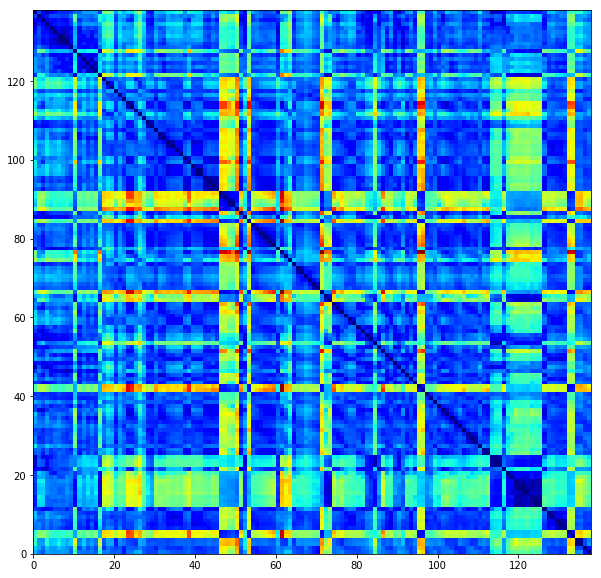

In [374]:
plt.figure(figsize=(10,10))
plt.imshow(dist, cmap='jet',interpolation='nearest', origin='upper', extent=[0,len(dist),0,len(dist)], aspect='auto')
#plt.colorbar()

In [375]:
pd.DataFrame(dist).to_csv(train_root + "mot_dist_mat", header=False, index=False)

In [376]:
dist_mat = dist

In [377]:
np.isnan(np.min(dist_mat))

False

# Hierarchical clustering

In [378]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

dist_array = ssd.squareform(dist_mat)#ssd.squareform(np.around(dist_mat, decimals = 5))

Z = linkage(dist_array, method='single', metric='minkowski')#,optimal_ordering=True)

plt.figure(figsize=(30,10))
dn = dendrogram(Z)
plt.show()

In [379]:
Z[:20]

array([[ 40.        ,  41.        ,  14.08222247,   2.        ],
       [134.        , 135.        ,  15.06886064,   2.        ],
       [  6.        ,   7.        ,  18.7942486 ,   2.        ],
       [120.        , 121.        ,  18.93997472,   2.        ],
       [122.        , 141.        ,  19.233473  ,   3.        ],
       [124.        , 125.        ,  26.06005193,   2.        ],
       [  8.        , 140.        ,  26.81867955,   3.        ],
       [114.        , 115.        ,  29.37702827,   2.        ],
       [ 48.        ,  49.        ,  45.02938718,   2.        ],
       [ 44.        ,  45.        ,  48.85897829,   2.        ],
       [123.        , 143.        ,  51.41506036,   3.        ],
       [113.        , 145.        ,  51.89515389,   3.        ],
       [ 43.        , 147.        ,  53.26712494,   3.        ],
       [142.        , 148.        ,  58.87919366,   6.        ],
       [129.        , 130.        ,  59.08160998,   2.        ],
       [ 42.        , 150

In [380]:
t = 0.4*max(Z[:,2])
clusters = fcluster(Z, t, criterion="distance")

In [381]:
t

144.9186227768178

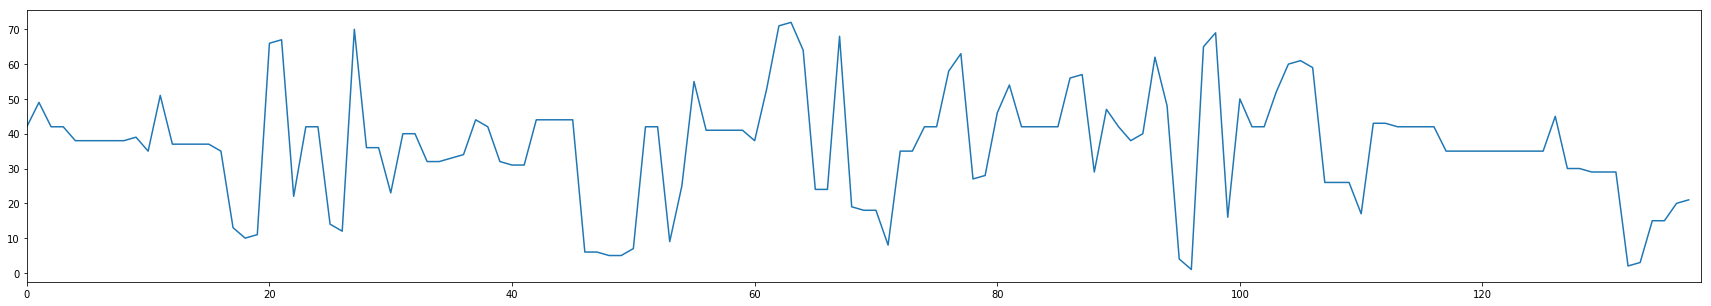

In [382]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(clusters))
plt.plot(clusters)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


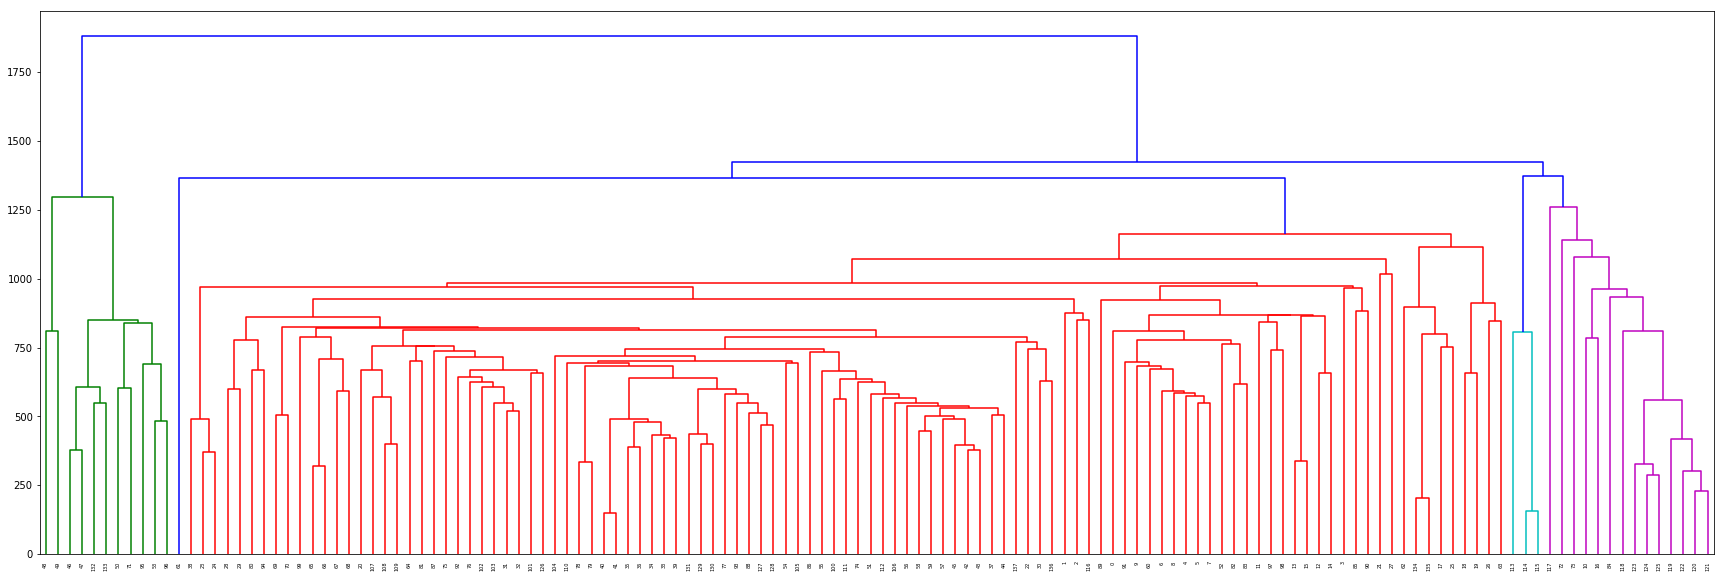

In [383]:
from scipy.cluster import hierarchy
ytdist = dist
Z = hierarchy.linkage(ytdist, 'single')
plt.figure(figsize=(30,10))
dn = hierarchy.dendrogram(Z)

In [384]:
len(clusters)

138

# Motif representative calculation

In [385]:
mot_id = pd.DataFrame(clusters,columns=["mot_id"])

In [386]:
all_mots_clusters = pd.concat([mot_id,all_mots],axis = 1,sort=False)

In [387]:
all_mots_clusters

mot_id          5          6          7          8          9         10  \
0        42   2.971992   3.217819   3.732120   3.276589   3.398201   2.466905   
1        49   4.024171   4.306880   4.234106   4.138472   4.507705   4.188239   
2        42   2.427679   2.229441   1.944036   2.147479   2.104197   2.164066   
3        42   1.525826   2.563308   3.878207   4.317726   3.510930   3.012356   
4        38   2.086360   2.170706   3.306988   3.031025   2.762163   3.008293   
5        38   1.901410   0.707410   1.307370   2.072817   0.729219   0.749843   
6        38  11.402236  11.402858  11.296633  11.148668  11.263346  11.269059   
7        38  10.923474   9.544792   8.252158   5.440895   4.584930   3.526736   
8        38   5.440895   4.584930   3.526736   1.638700   1.056778   1.305923   
9        39  -0.477002   1.441548   4.390778   7.377860   9.575551  11.088784   
10       35   8.700657   5.973151   6.570947   7.998576   7.879696   8.848847   
11       51  -0.107185  -0.311690  -0.595825  -0.331944  -0.719476  -0.607319   
12       37   6.374334   9.311358  11.097669  13.344637  12.740171  11.973901   
13       37   5.613498   2.987386   0.103875  -2.455180  -4.968820  -5.729822   
14       37  12.388696  12.317354  11.321547   7.199842   2.353301  -1.128143   
15       37  -4.771049  -4.485501  -6.741948  -7.989201  -0.476013   0.891934   
16       35   8.300720   9.040214   6.994238   7.807192   7.468976  10.672761   
17       13 -11.248800 -10.101492  -5.352394  -3.116472  -2.782426  -0.435036   
18       10   1.850688   2.928282   2.951416   0.640009  -2.100409  -8.256651   
19       11   0.644303 -15.724437 -22.091502 -13.115674  -7.884404  -1.786817   
20       66  -0.191677   5.646818  11.474819  10.556609   5.024201  -2.108215   
21       67  -1.780870  -1.843903  -1.493578  -1.254272  -0.151723   1.561082   
22       22   0.634797   4.016910   1.409534  -6.916948 -10.237378  -6.063140   
23       42  -1.206319  -5.493584  -6.154456  -8.420119  -9.951110  -8.433066   
24       42  -2.766924  -1.102841  -0.445068   0.372175  -0.434829  -2.107901   
25       14  -1.928377  -3.760753  -3.743787  -3.045067  -2.129204  -2.179154   
26       12  -3.147025  -1.339640  -0.273481   0.609641  -0.451945  -2.700484   
27       70   9.488765  18.109702  16.868282   1.135278 -11.803023 -14.874001   
28       36  -8.032895 -13.476538 -13.304713  -6.027019  -1.002407   1.055918   
29       36  -5.496916   0.133355   4.643646   9.560294   9.864736   4.689858   
..      ...        ...        ...        ...        ...        ...        ...   
108      26   4.403029   0.819826  -7.113843 -16.510863 -13.954722  -4.972276   
109      26   1.363440   4.122541   6.124332   5.279434   3.863034   2.937823   
110      17  -2.157165  -2.510860  -2.006368  -1.849891  -1.813161  -1.662726   
111      43   6.505164  12.535822  15.569889  12.157195   3.700766  -4.465869   
112      43  -4.465869  -8.388250  -9.360262  -7.799579  -3.806405  -0.965901   
113      42   2.845425   2.866177   2.253293   1.976893   2.502993   3.750336   
114      42   6.763889   6.566878   6.694177   6.329426   5.051065   5.912363   
115      42   4.205726   4.376900   5.802918   6.485875   6.949365   6.531431   
116      42   4.562287   3.927812   3.985675   3.437405   3.220083   3.591258   
117      35   1.105004   5.561058   7.294464   6.879169   7.051170   8.858572   
118      35  13.845287  12.822757  13.206664  14.416713  11.698895  14.250137   
119      35   6.612972   6.777840   6.985905   7.232079   7.133668   7.743267   
120      35   7.033719   7.325702   6.940914   7.338668   7.349720   7.320832   
121      35   7.525046   8.605161  10.124282  12.528966  13.923923  14.581105   
122      35  12.528966  13.923923  14.581105  15.253977  14.390287  12.817043   
123      35   6.297621   5.725739   6.055824   5.939129   6.165110   5.992522   
124      35  11.472917   9.533044   6.709480   7.006815   5.696386   5.101708   
125      35   5.794127   6.247153   

In [388]:
clusters

array([42, 49, 42, 42, 38, 38, 38, 38, 38, 39, 35, 51, 37, 37, 37, 37, 35,
       13, 10, 11, 66, 67, 22, 42, 42, 14, 12, 70, 36, 36, 23, 40, 40, 32,
       32, 33, 34, 44, 42, 32, 31, 31, 44, 44, 44, 44,  6,  6,  5,  5,  7,
       42, 42,  9, 25, 55, 41, 41, 41, 41, 38, 53, 71, 72, 64, 24, 24, 68,
       19, 18, 18,  8, 35, 35, 42, 42, 58, 63, 27, 28, 46, 54, 42, 42, 42,
       42, 56, 57, 29, 47, 42, 38, 40, 62, 48,  4,  1, 65, 69, 16, 50, 42,
       42, 52, 60, 61, 59, 26, 26, 26, 17, 43, 43, 42, 42, 42, 42, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 45, 30, 30, 29, 29, 29,  2,  3, 15, 15,
       20, 21], dtype=int32)

In [389]:
import itertools
motif_representatives = []
for ids in set(clusters):
    test = all_mots_clusters[all_mots_clusters["mot_id"] == ids].reset_index()
    test = test.drop(columns = ["mot_id","index"])
    
    print "###",ids,"###"
    #calculate distance matrix
    dist2 = []

    for n in tqdm(range(len(test))):
        di2 = []
        x = test.values[n]
        for m in range(len(test)):
            y = test.values[m]

            di2.append(pydtw.dtw(x,y).get_dist())
        dist2.append(di2)
        
    rep_list = np.array(pd.DataFrame(dist2).sum())
    rep_place = np.where(rep_list == rep_list.min())

    motif_representatives.append(np.append(np.array(ids),(test.T[rep_place[0][0]].values)))


  0%|          | 0/1 [00:00<?, ?it/s]

### 1 ###
### 2 ###
### 3 ###
### 4 ###
### 5 ###
### 6 ###
### 7 ###
### 8 ###
### 9 ###
### 10 ###
### 11 ###
### 12 ###
### 13 ###
### 14 ###



  0%|          | 0/1 [00:00<?, ?it/s]

### 15 ###
### 16 ###
### 17 ###
### 18 ###
### 19 ###
### 20 ###
### 21 ###
### 22 ###
### 23 ###
### 24 ###
### 25 ###
### 26 ###
### 27 ###
### 28 ###



100%|██████████| 7/7 [00:00<00:00, 568.14it/s]

### 29 ###
### 30 ###
### 31 ###
### 32 ###
### 33 ###
### 34 ###
### 35 ###
### 36 ###
### 37 ###
### 38 ###



  0%|          | 0/1 [00:00<?, ?it/s]


### 39 ###
### 40 ###
### 41 ###
### 42 ###
### 43 ###
### 44 ###
### 45 ###


100%|██████████| 1/1 [00:00<00:00, 601.33it/s]

### 46 ###
### 47 ###
### 48 ###
### 49 ###
### 50 ###
### 51 ###
### 52 ###
### 53 ###
### 54 ###
### 55 ###
### 56 ###
### 57 ###
### 58 ###



100%|██████████| 1/1 [00:00<00:00, 536.49it/s]

### 59 ###
### 60 ###
### 61 ###
### 62 ###
### 63 ###
### 64 ###
### 65 ###
### 66 ###
### 67 ###
### 68 ###
### 69 ###
### 70 ###
### 71 ###
### 72 ###


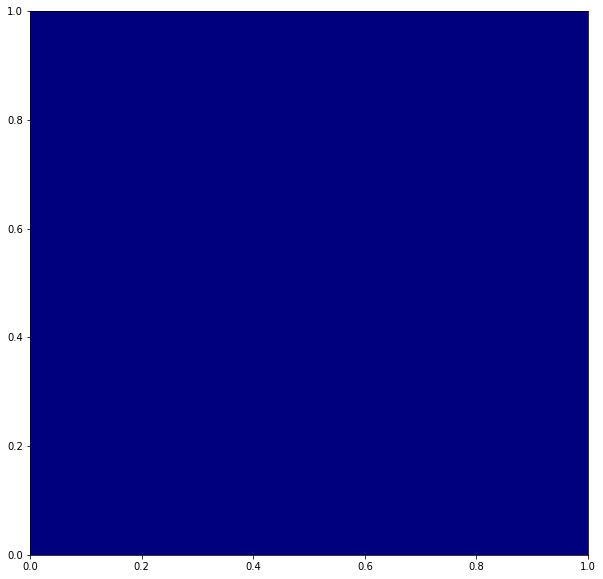

In [390]:
plt.figure(figsize=(10,10))
plt.imshow(dist2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(dist2),0,len(dist2)], aspect='auto')

In [391]:
motif_representatives

[array([ 1.        , 26.22872744, 17.27655748, 13.32198323,  3.7447814 ,
        12.31364068, 24.55387895, 23.00981219, 12.87947493,  3.57750687,
         2.23512229, 16.43958546, 27.12174361, 19.35101266,  9.34085044,
         1.55374377,  8.41305736, 23.37015333, 23.416827  , 13.6406295 ,
         5.14438791,  2.49387124, 16.29788987, 24.84484484, 19.1053449 ,
        11.08726834,  3.30546435,  5.88239248, 21.42600632, 23.77765599,
        16.33365611,  6.96117228,  2.38382939, 11.53569447, 24.01405926,
        19.99607367, 13.28429163,  5.30940834,  5.95120006, 18.68180291,
        22.95370518, 16.85195856,  9.40319097,  3.531569  ,  9.91352161,
        22.09402104, 20.61749945, 13.18052267,  5.55405598,  5.62334296,
        16.20979807, 22.47177221, 18.13332057, 10.7512196 ,  2.91034864,
         9.23504212, 19.83530767, 20.49996259, 14.87368544,  8.15512406,
         5.10660877, 13.5443287 , 21.5736272 , 18.59311602, 11.76091306,
         5.38580916,  7.42938307, 18.95405736, 21.9

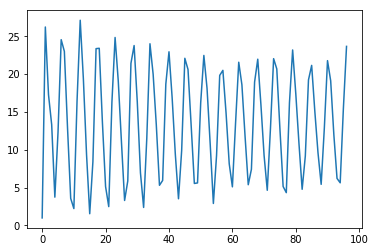

In [392]:
plt.plot(motif_representatives[0])

In [393]:
motif_representatives = pd.DataFrame(motif_representatives)

In [394]:
#Saving motif representatives

In [395]:
train_root

'env/10/dat/train_dat/'

In [396]:
motif_representatives.to_csv(train_root + "motif_representatives", header=False, index=False)

In [397]:
len(clusters)

138

In [398]:
len(motif_representatives)

72

In [399]:
motif_representatives

0          1          2          3          4          5          6   \
0    1.0  26.228727  17.276557  13.321983   3.744781  12.313641  24.553879   
1    2.0  17.969401   7.418181   3.350453  13.575006  24.503773  19.075542   
2    3.0  11.346902   4.478969   5.768876  19.200073  24.140486  15.003017   
3    4.0   8.187809  25.576759  22.088763  13.914551   5.960564   3.611903   
4    5.0  16.574823  20.852363  17.766049  11.162126   4.273037   5.633762   
5    6.0   4.636507  12.009997  25.077120  18.942911  12.534361   2.935785   
6    7.0  20.211339  18.877240  11.526484   6.967860   6.868673  14.521200   
7    8.0  13.852946  24.286676  20.848003  12.154962   4.832248   6.111186   
8    9.0  20.576957  13.106131   2.960339   9.657389  22.698071  18.600211   
9   10.0   1.850688   2.928282   2.951416   0.640009  -2.100409  -8.256651   
10  11.0   0.644303 -15.724437 -22.091502 -13.115674  -7.884404  -1.786817   
11  12.0  -3.147025  -1.339640  -0.273481   0.609641  -0.451945  -2.700484   
12  13.0 -11.248800 -10.101492  -5.352394  -3.116472  -2.782426  -0.435036   
13  14.0  -1.928377  -3.760753  -3.743787  -3.045067  -2.129204  -2.179154   
14  15.0  -5.279593  -5.744147  -4.383393  -4.167696  -5.323732  -7.064607   
15  16.0  -0.964543  -1.579498  -2.339877  -2.685708  -3.693783  -3.708663   
16  17.0  -2.157165  -2.510860  -2.006368  -1.849891  -1.813161  -1.662726   
17  18.0  -3.727501   3.077287   7.552867  12.878457  10.093593   3.927605   
18  19.0  -5.773906   1.571741   6.308222  11.593212   9.634551  -0.502671   
19  20.0  -8.327905  -4.258696  -0.157772   0.618343   0.032573  -0.541621   
20  21.0  -7.083569 -13.472475  -7.971186   1.978494  11.146612  13.443124   
21  22.0   0.634797   4.016910   1.409534  -6.916948 -10.237378  -6.063140   
22  23.0   0.246590  -1.663239  -4.397937  -2.743229   0.022790   2.253418   
23  24.0  -0.696885   0.086202   1.005556   1.798973   1.955360   1.139147   
24  25.0  -1.227823  -0.670008  -0.200508   1.037156   0.499296   0.574684   
25  26.0   4.403029   0.819826  -7.113843 -16.510863 -13.954722  -4.972276   
26  27.0  -4.369057  -4.642923  -3.010854  -2.859348 -10.100941 -12.635240   
27  28.0  -2.946803  -3.614784  -9.135853 -11.076604  -2.978240   5.064118   
28  29.0  -2.738178  -3.519152  -9.689102  -7.627196  -0.768147   5.371918   
29  30.0   8.390705   4.142547  -1.890437  -5.645689  -4.655939  -5.907707   
..   ...        ...        ...        ...        ...        ...        ...   
42  43.0   6.505164  12.535822  15.569889  12.157195   3.700766  -4.465869   
43  44.0  -6.509766  -5.276776  -4.975487  -4.490378  -3.794936  -4.029213   
44  45.0  -2.764163  -0.919451  -0.244250   1.481295   2.918743   2.336391   
45  46.0  -6.897256  -6.067123  -3.810789  -1.707388  -3.458531  -8.313909   
46  47.0  -0.144900   4.538056   7.272153   9.619066  10.989812   9.654502   
47  48.0  -1.938421  -0.768801  -1.504110  -1.924107  -1.708974  -6.166815   
48  49.0   4.024171   4.306880   4.234106   4.138472   4.507705   4.188239   
49  50.0  -4.889467  -3.840890  -2.091240   6.409124  14.071168  17.440702   
50  51.0  -0.107185  -0.311690  -0.595825  -0.331944  -0.719476  -0.607319   
51  52.0  -1.968508  -1.324852  -1.794441  -2.955886  -3.729511  -3.322646   
52  53.0  -6.387717  -7.830178 -11.536091 -10.891367 -13.353348  -8.706357   
53  54.0   2.706246   2.891588   2.888512   3.060335   3.129684   3.234295   
54  55.0  -0.704188  -5.799318  -6.526830  -1.539762   7.080999   9.260292   
55  56.0   3.265162   4.623135   4.344932   0.910136  -4.949684  -9.232310   
56  57.0   0.349331   0.335758  -0.500621  -0.539209  -0.119196   0.817504   
57  58.0  -0.950378  -1.865134  -2.689846  -6.414083 -11.962487 -10.626100   
58  59.0  -8.733616  -4.933390   0.127109   1.499175   3.720370   4.696856   
59  60.0  -0.808106  -0.759568  -1.944495  -3.467835  -5.020935  -5.431813   
60  61.0  -1.826831  -2.100939  -3.262026  -1.804030   0.968572   5.659557   
61  62.0  -4.774601  -7.2708

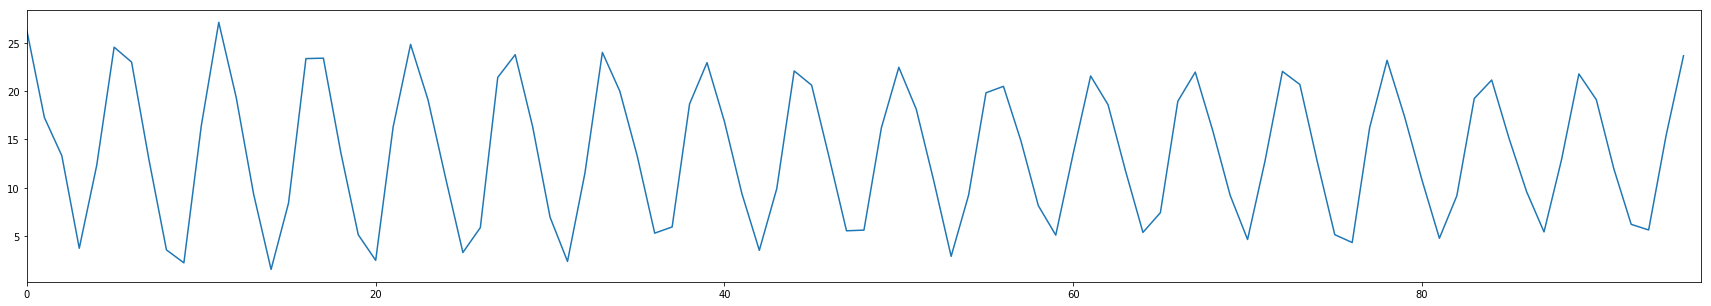

In [400]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(motif_representatives.T)-1)
plt.plot(motif_representatives.values[0,1:])

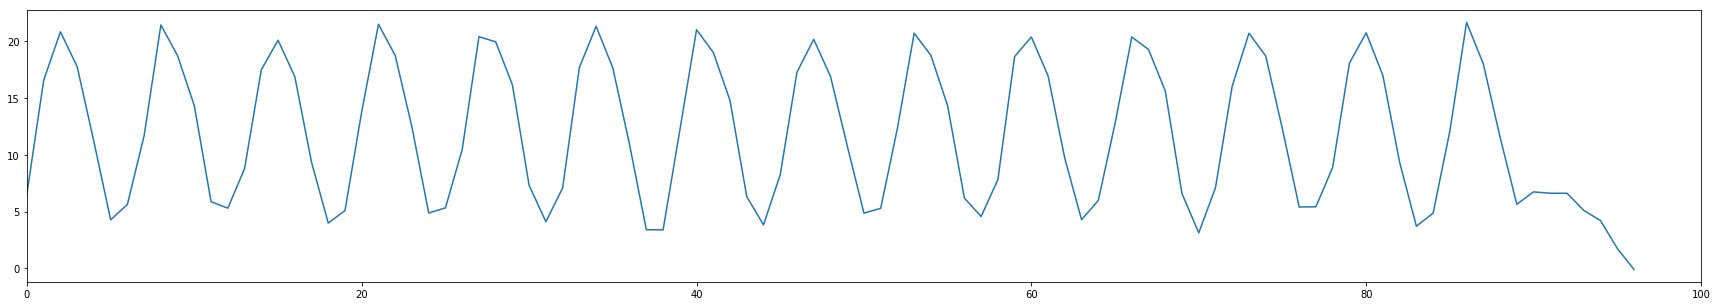

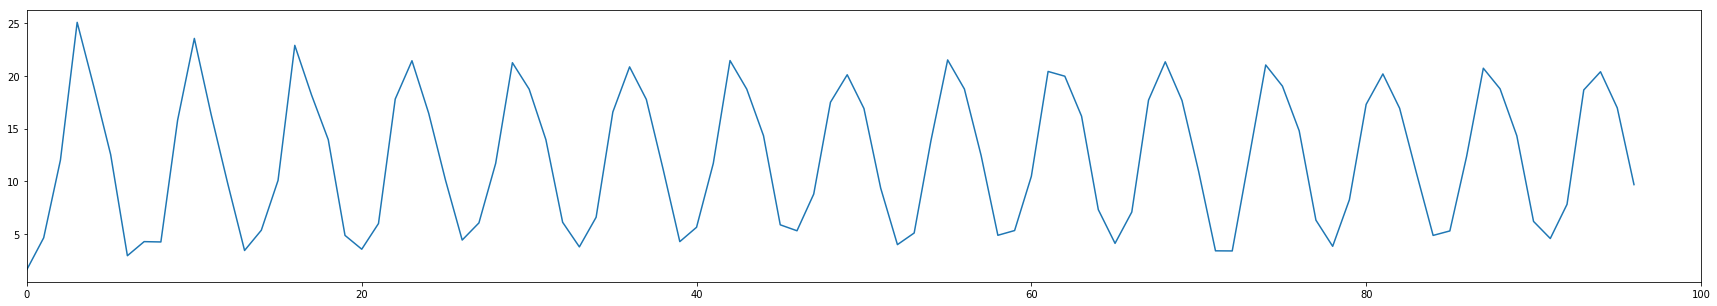

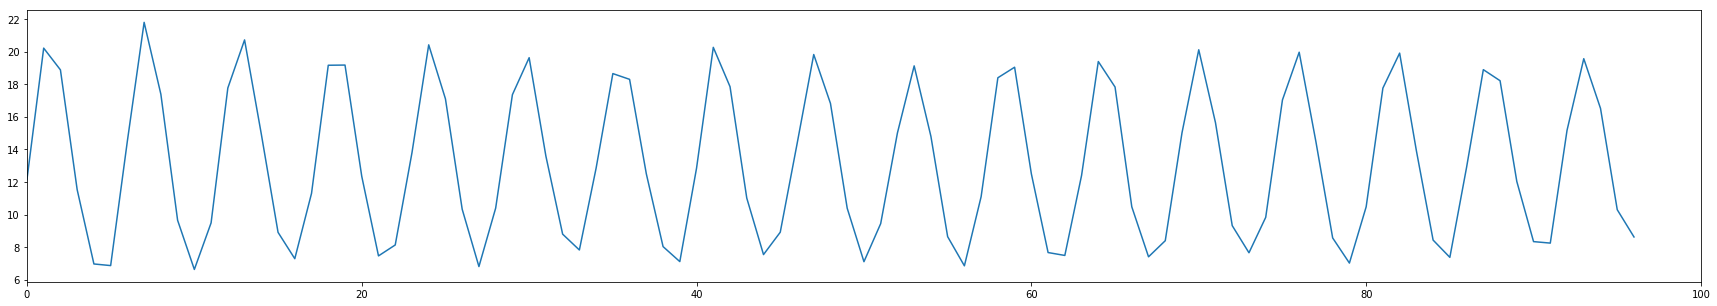

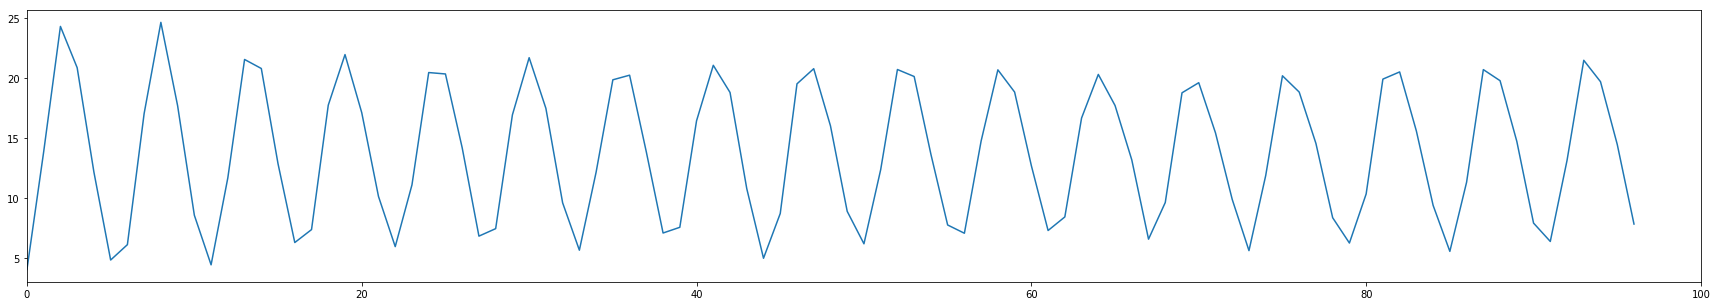

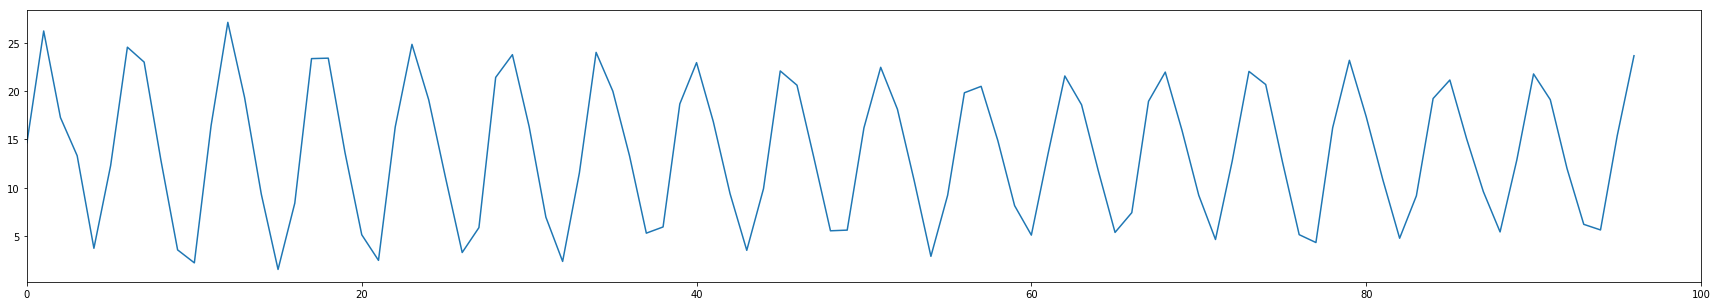

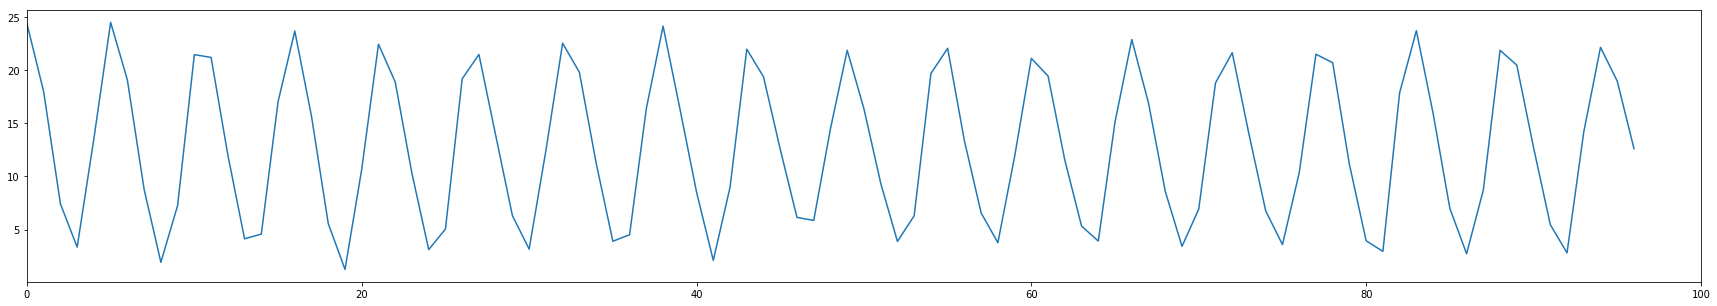

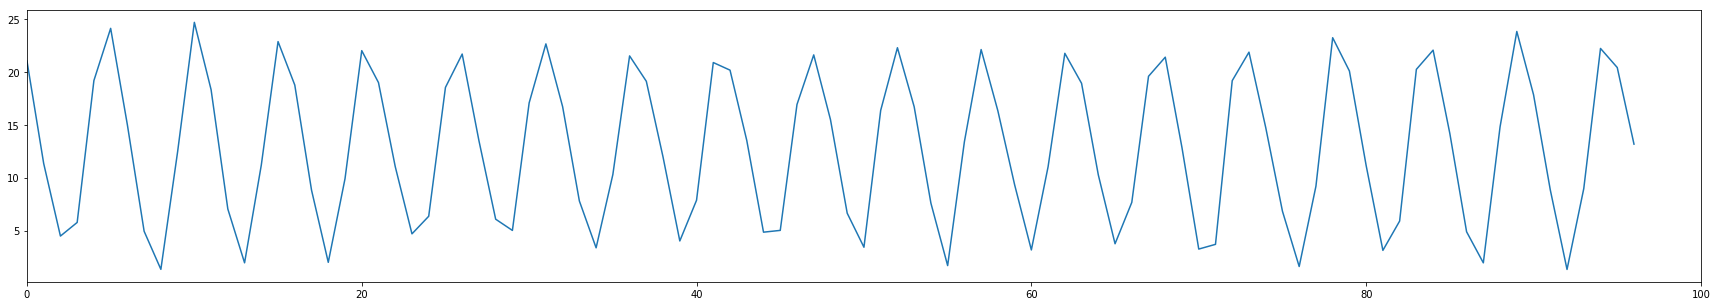

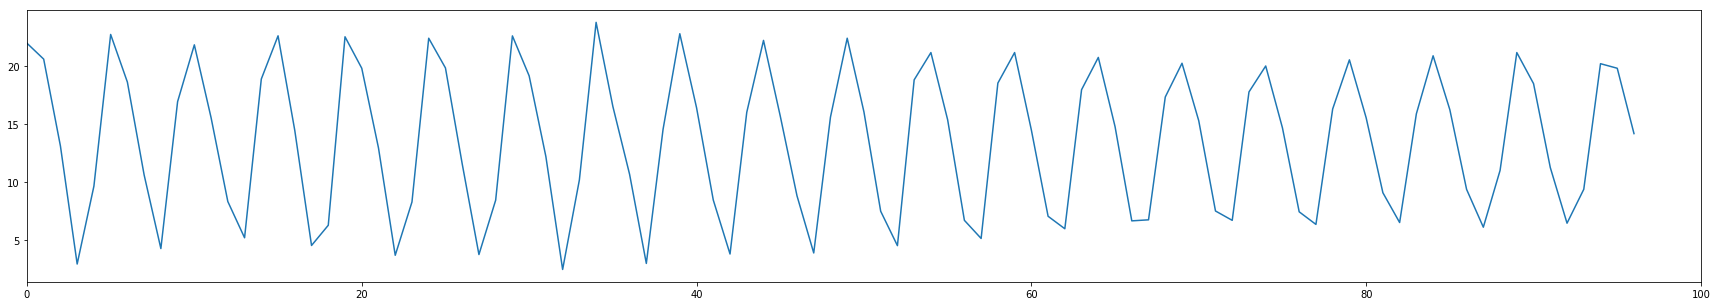

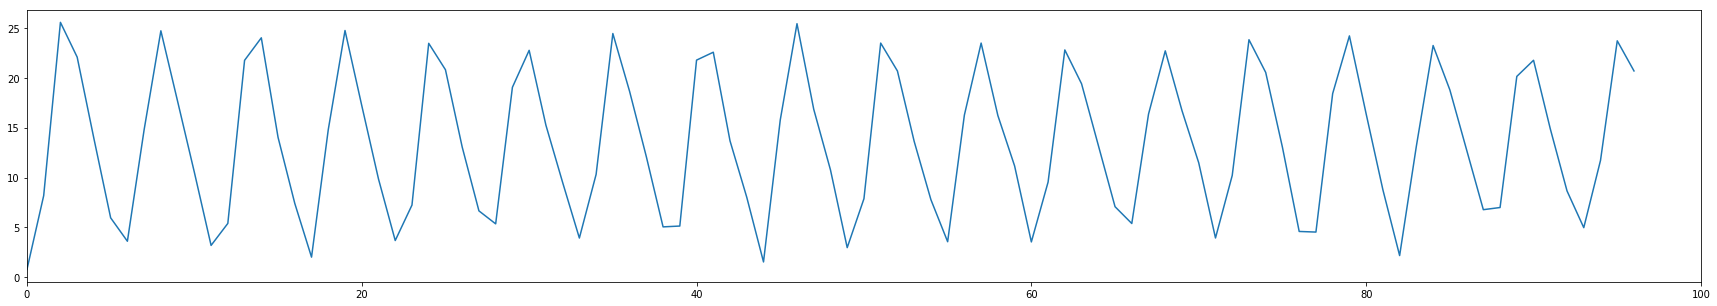

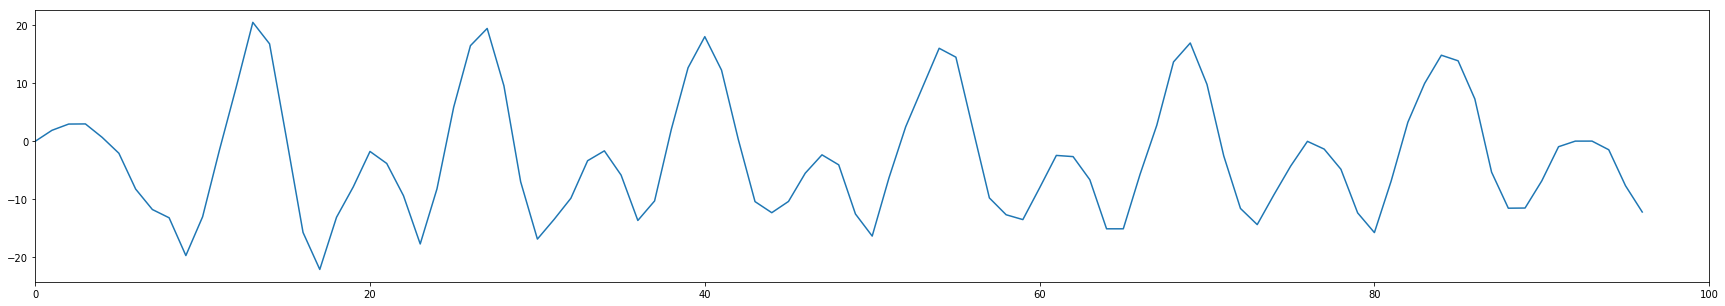

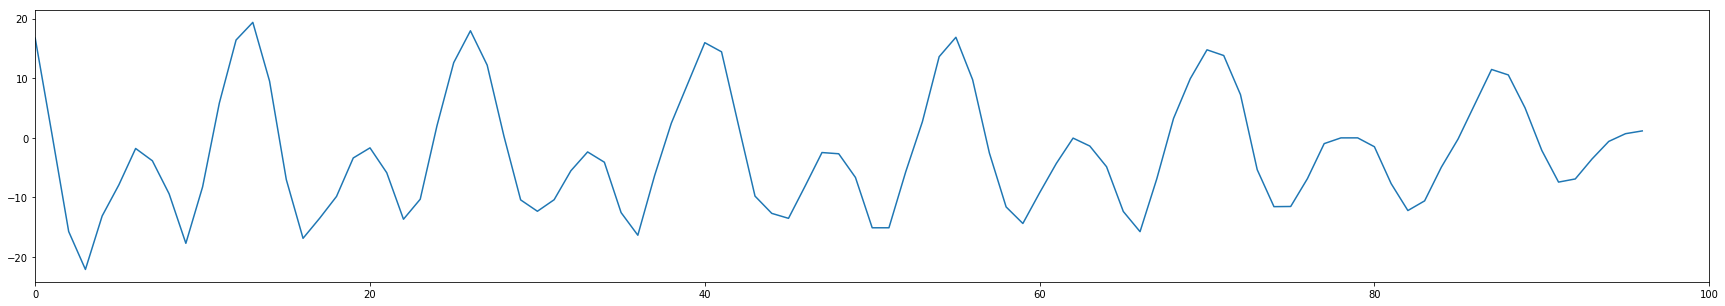

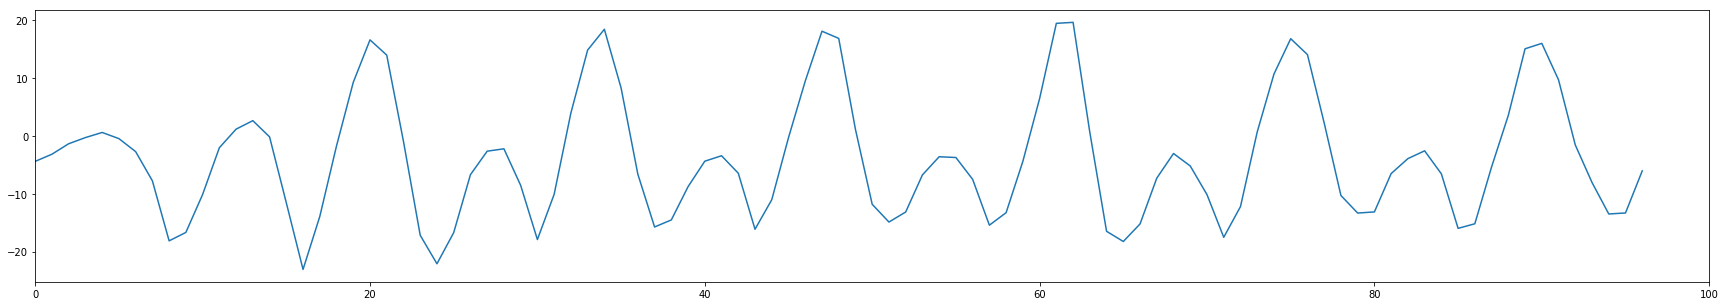

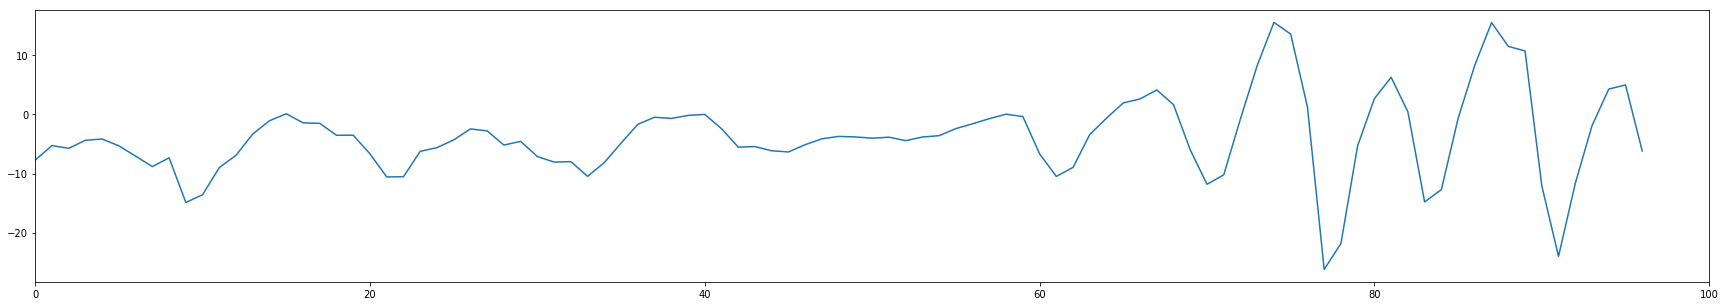

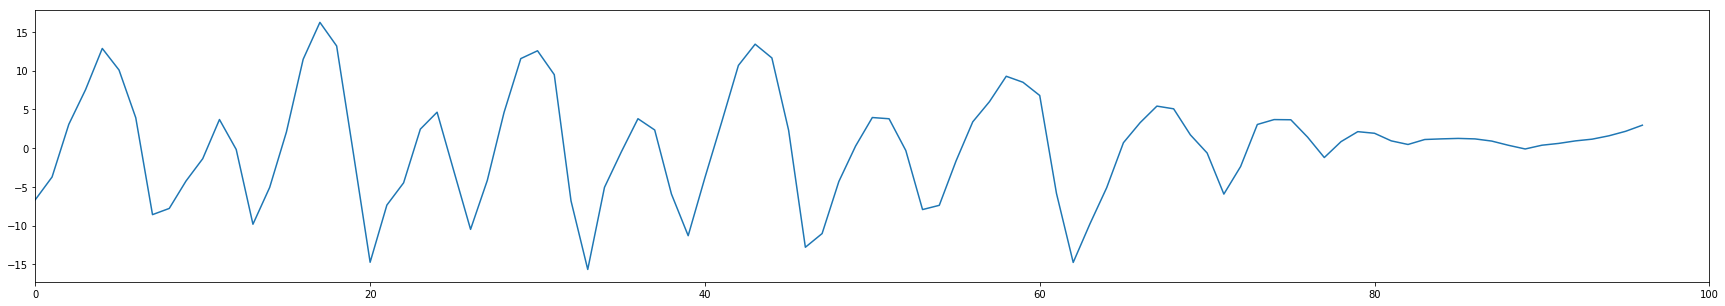

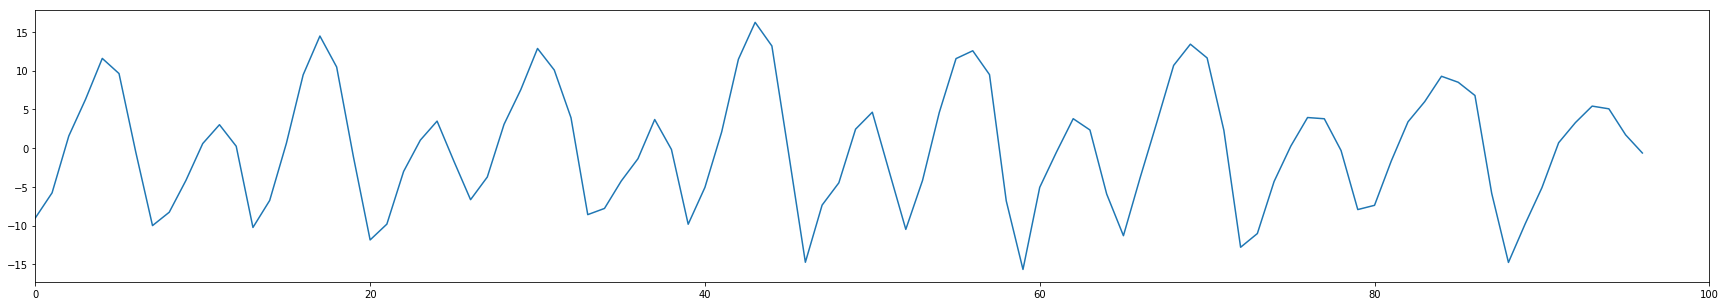

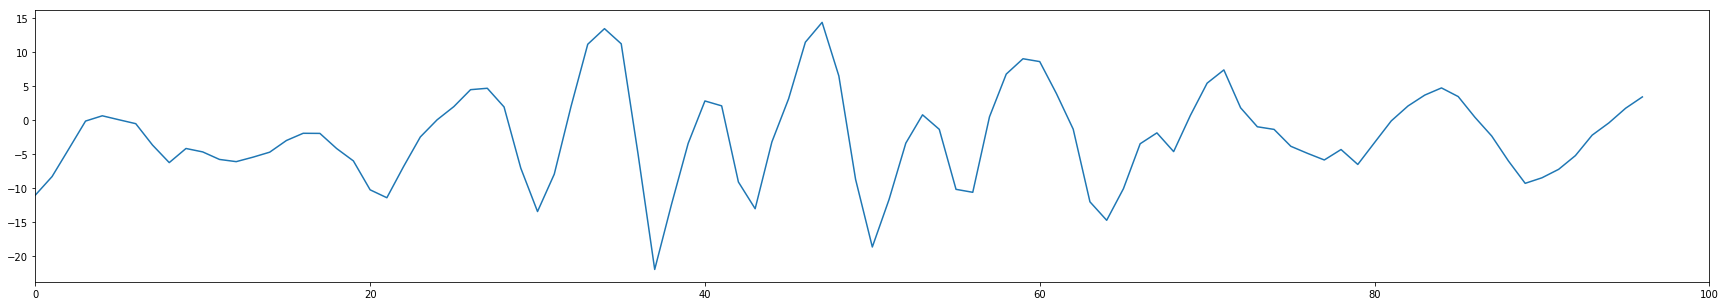

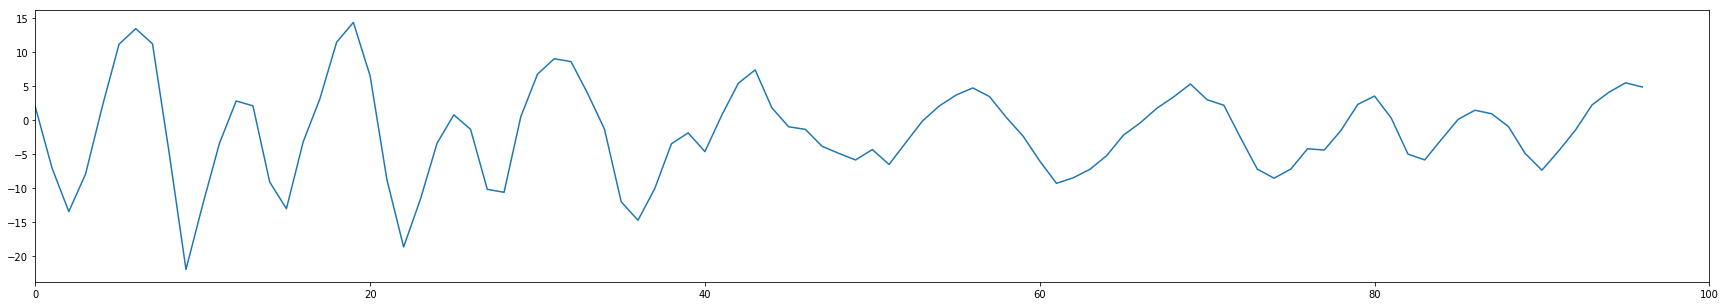

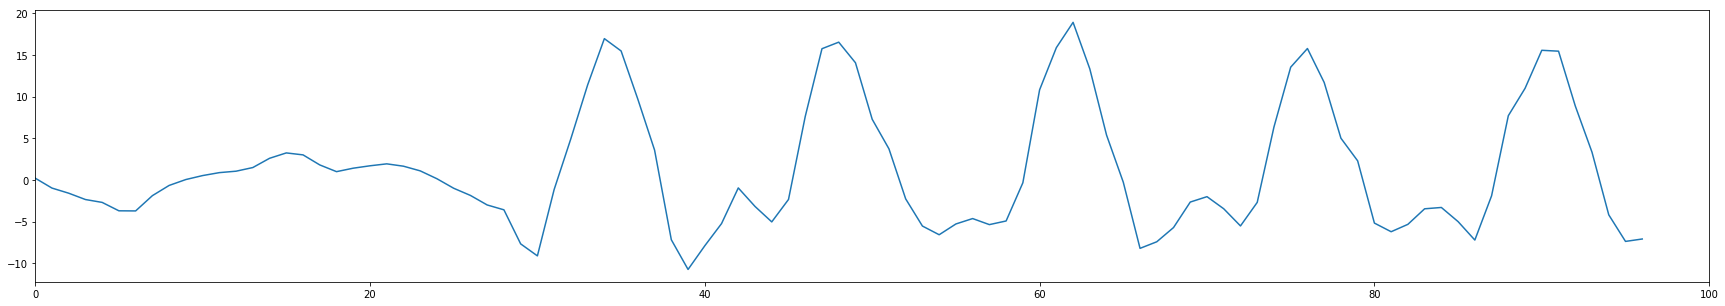

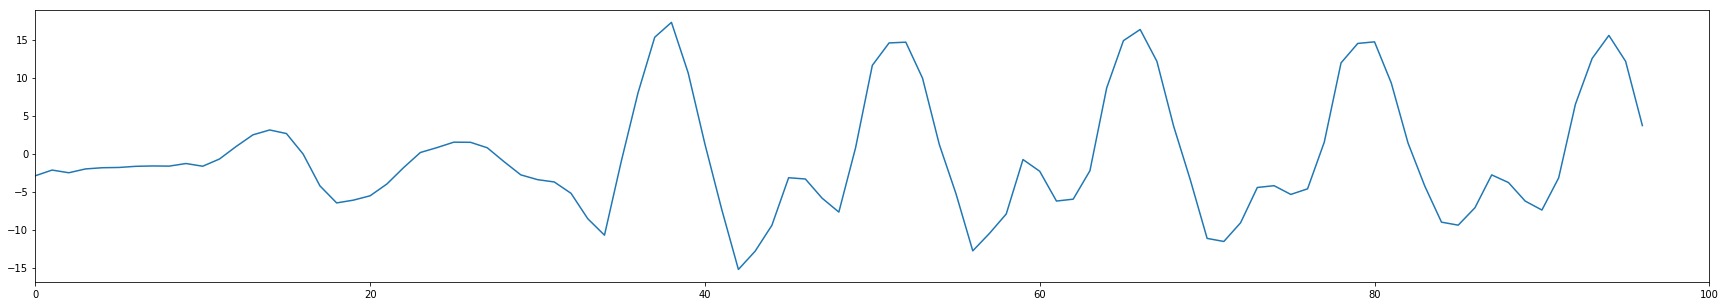

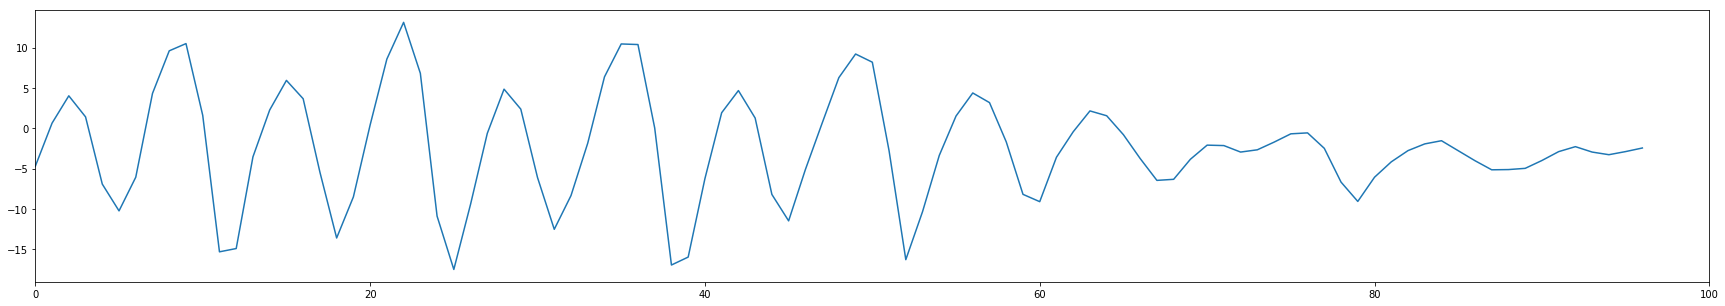

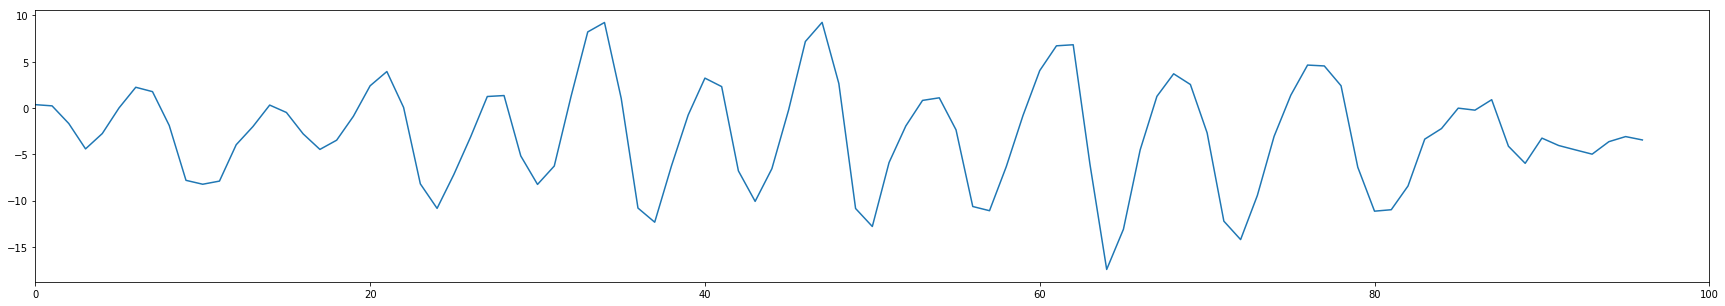

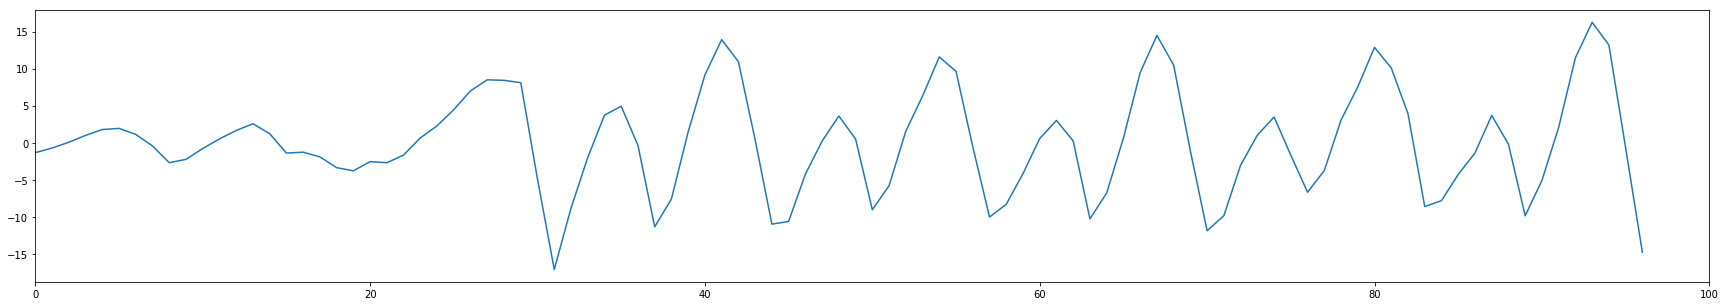

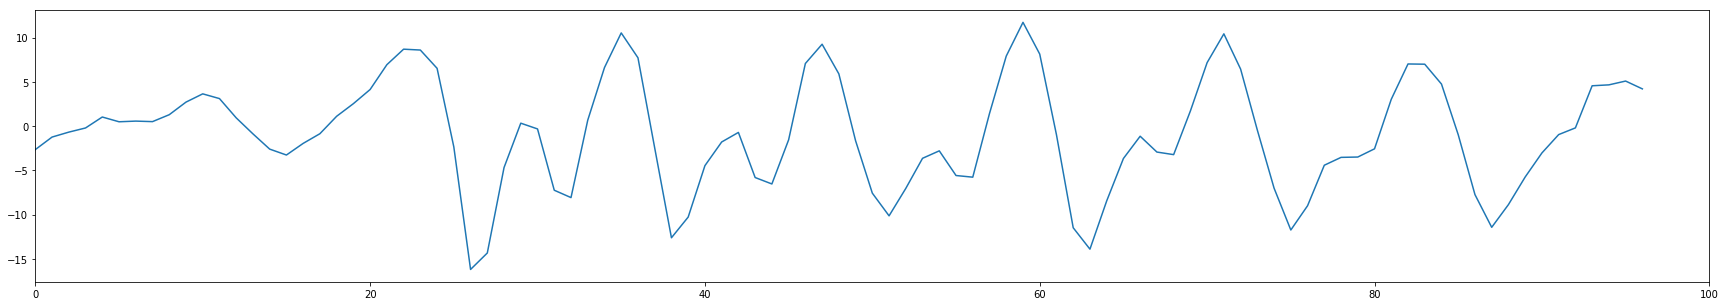

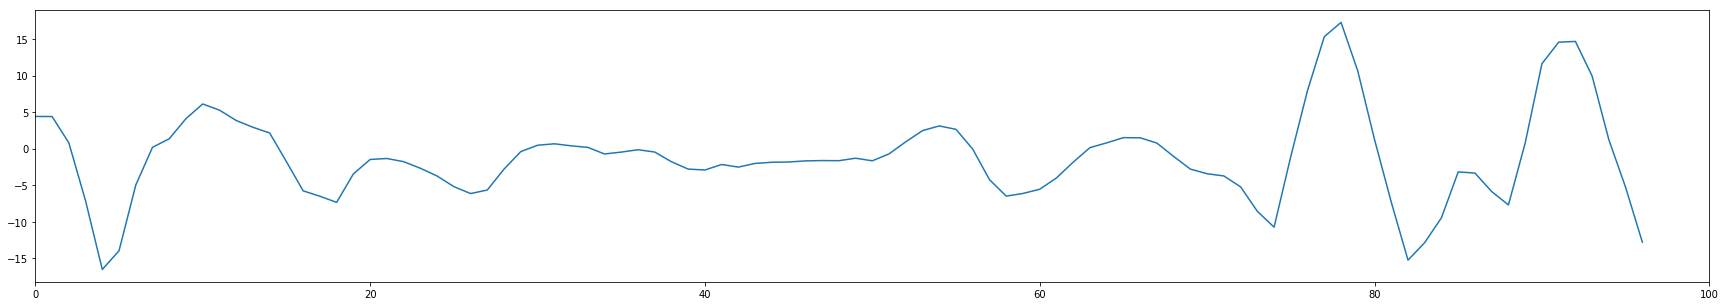

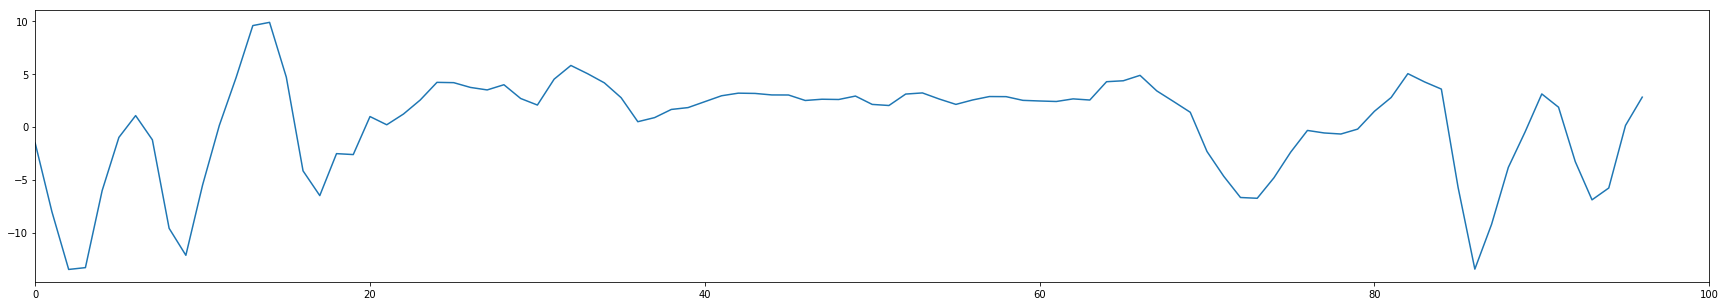

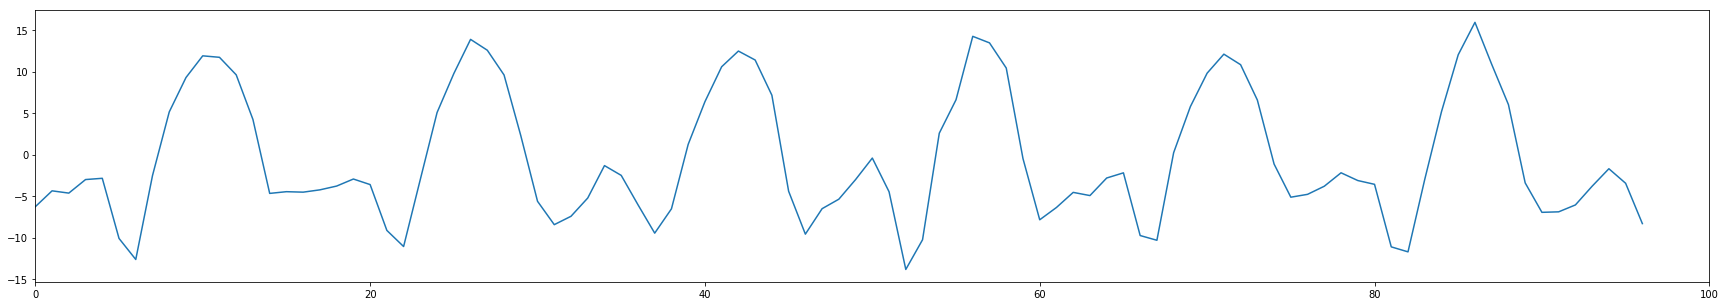

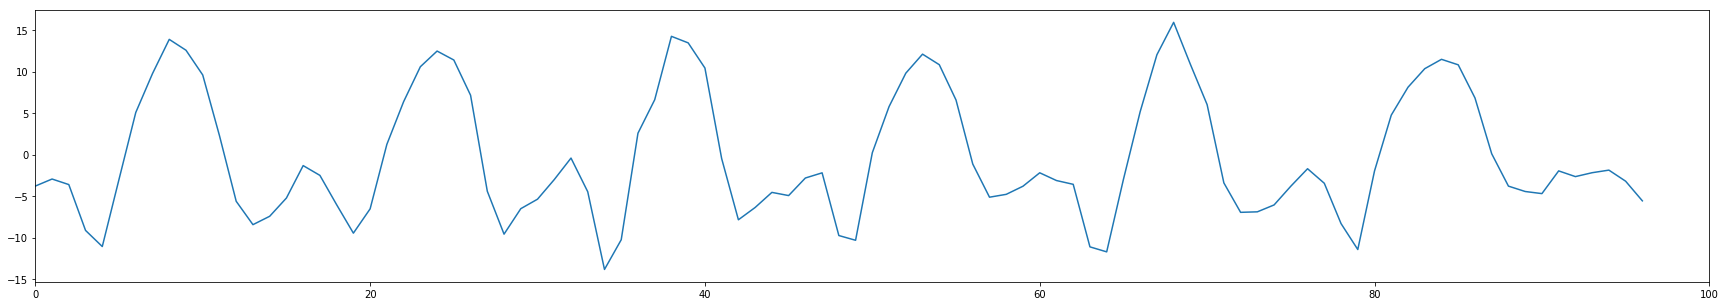

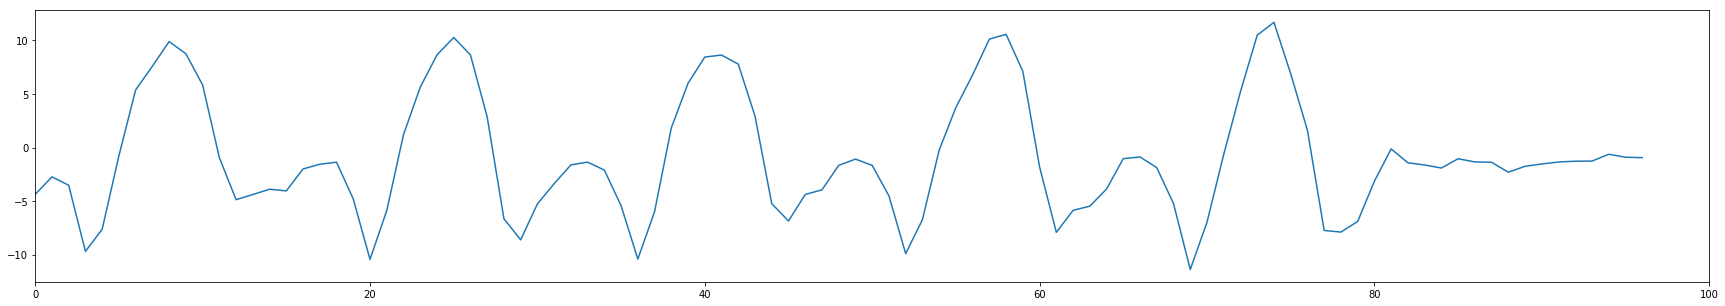

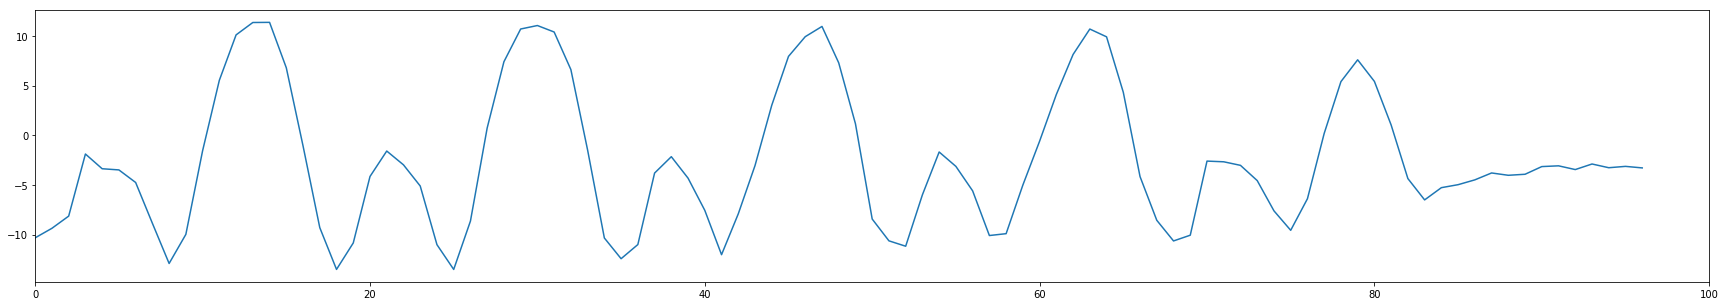

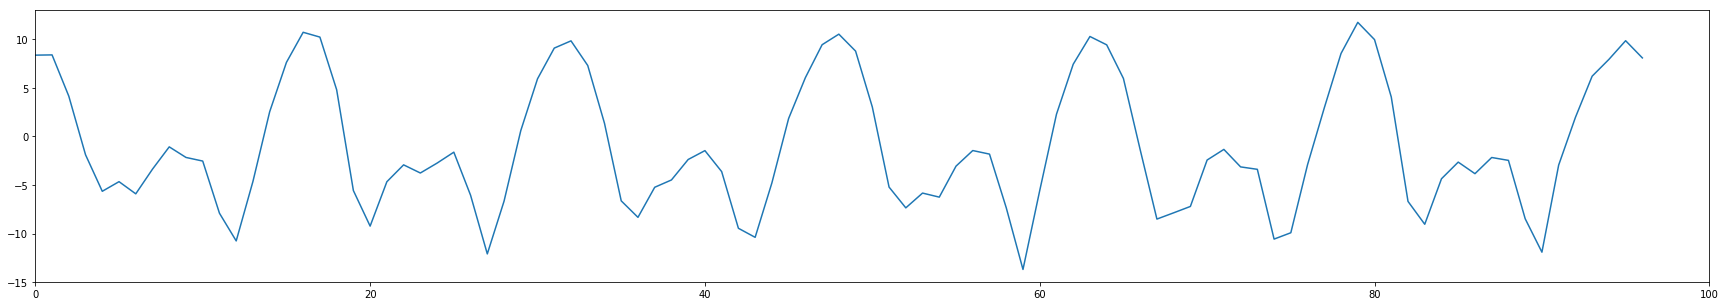

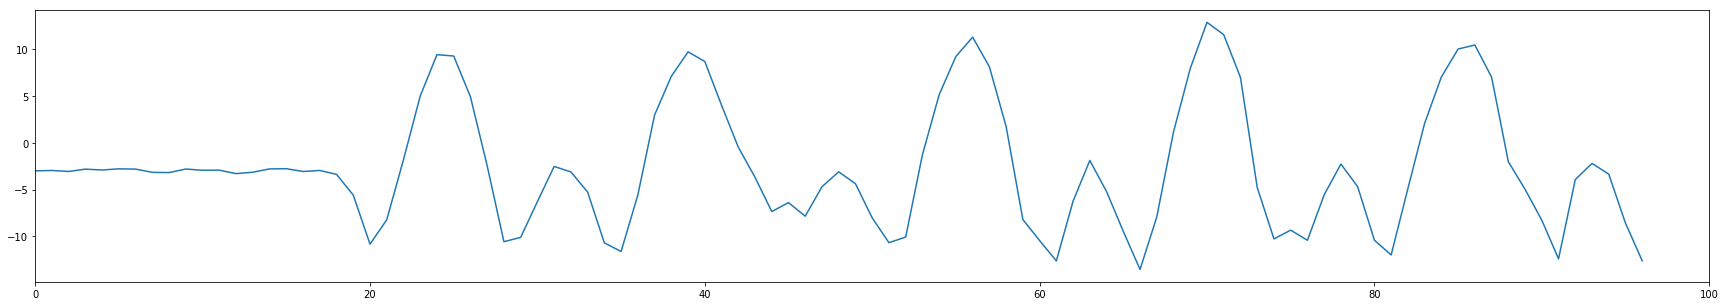

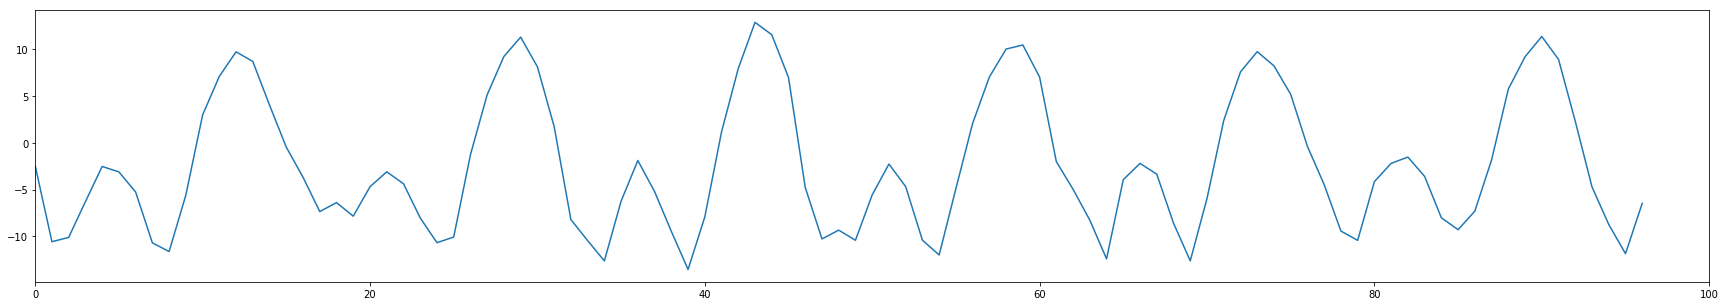

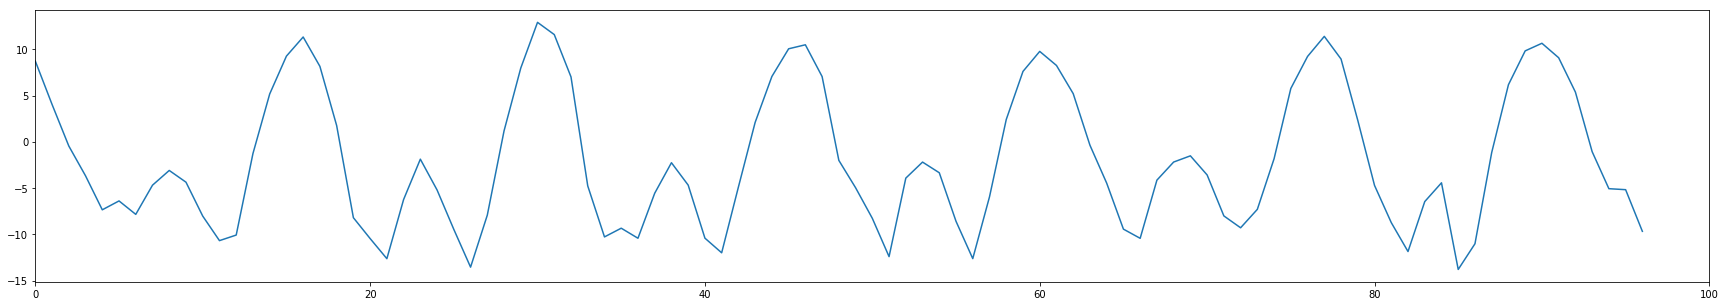

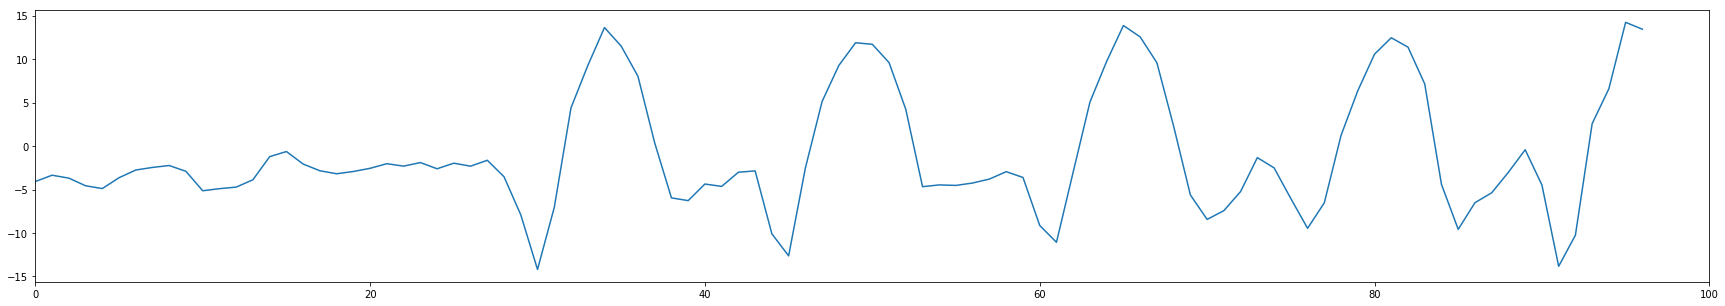

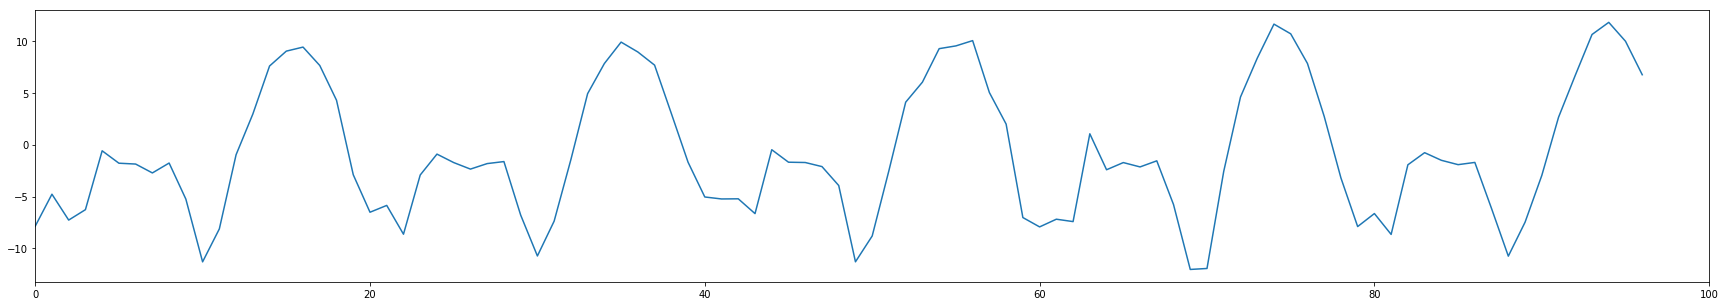

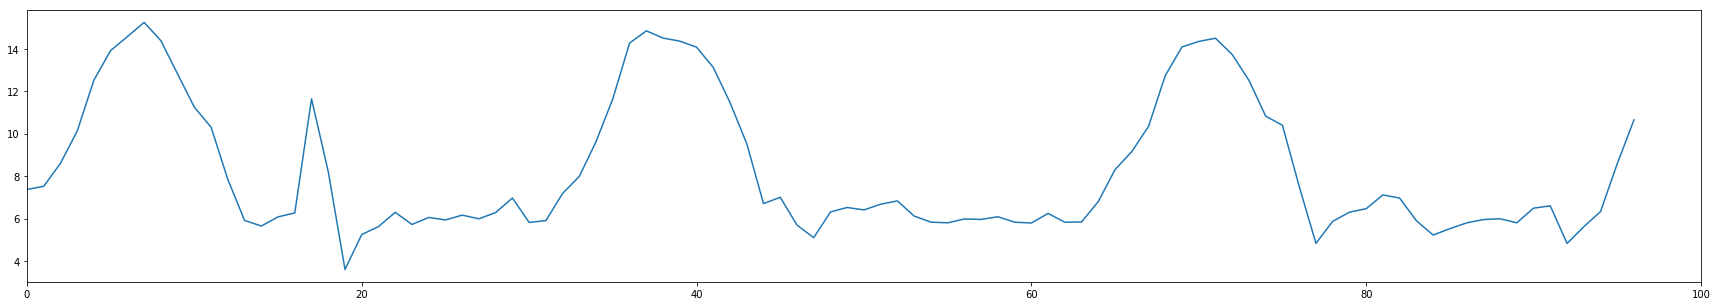

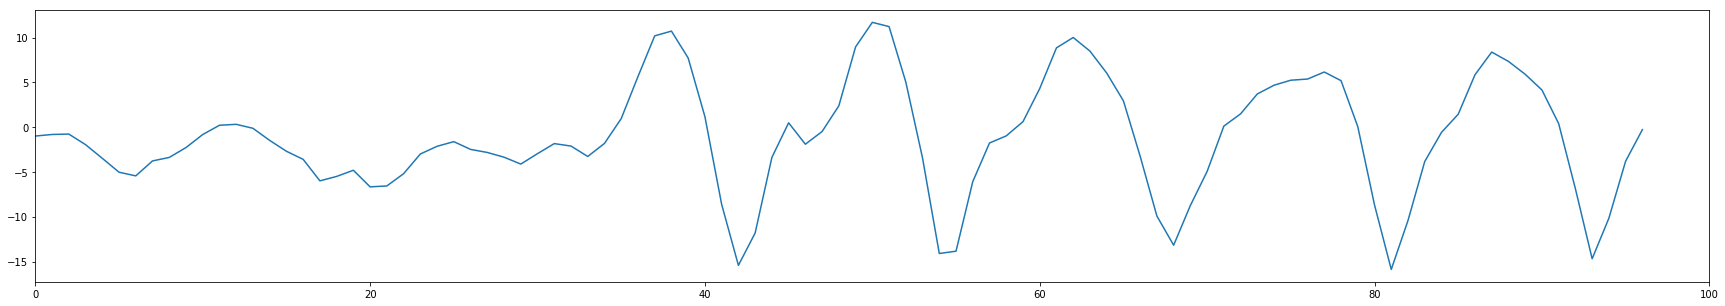

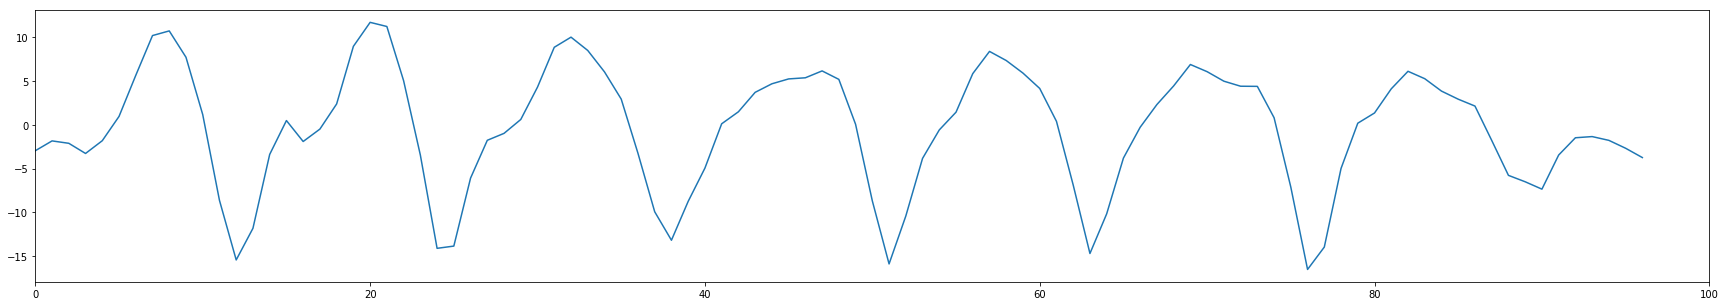

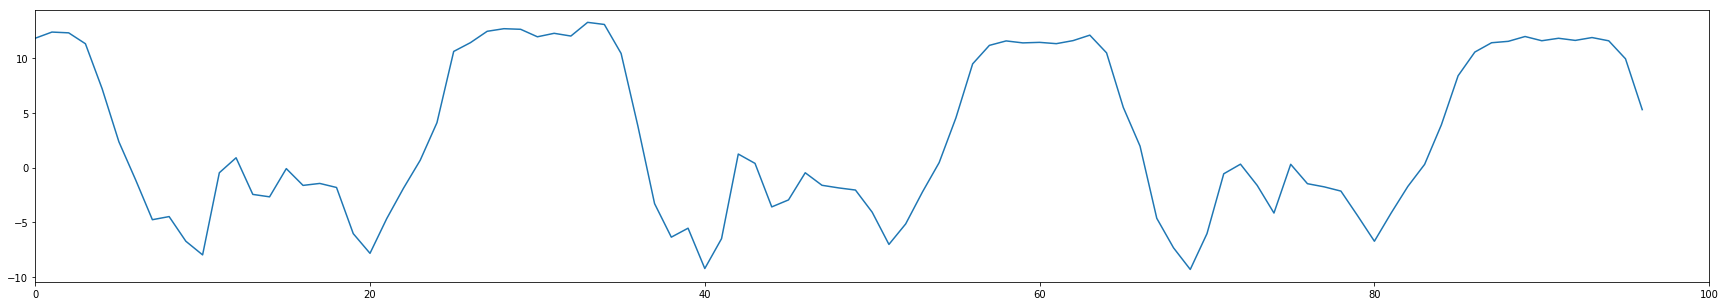

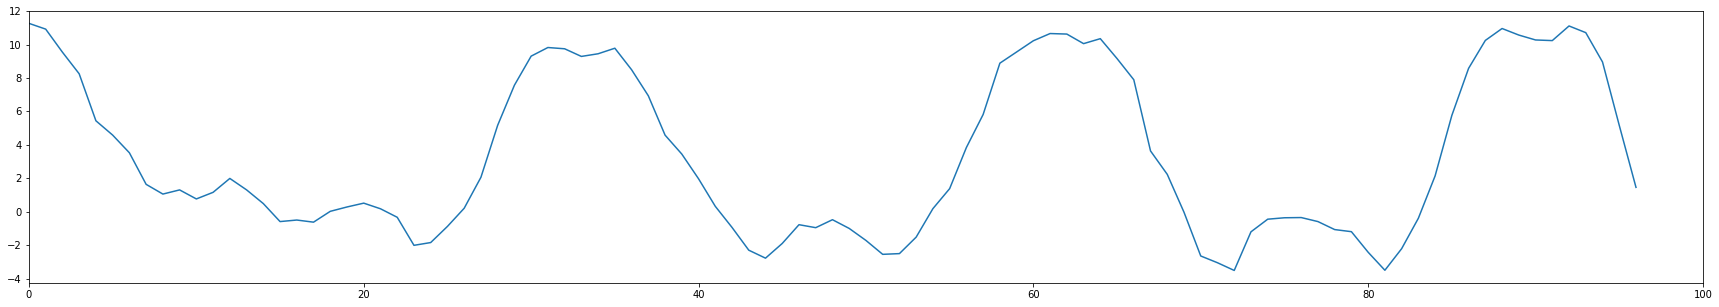

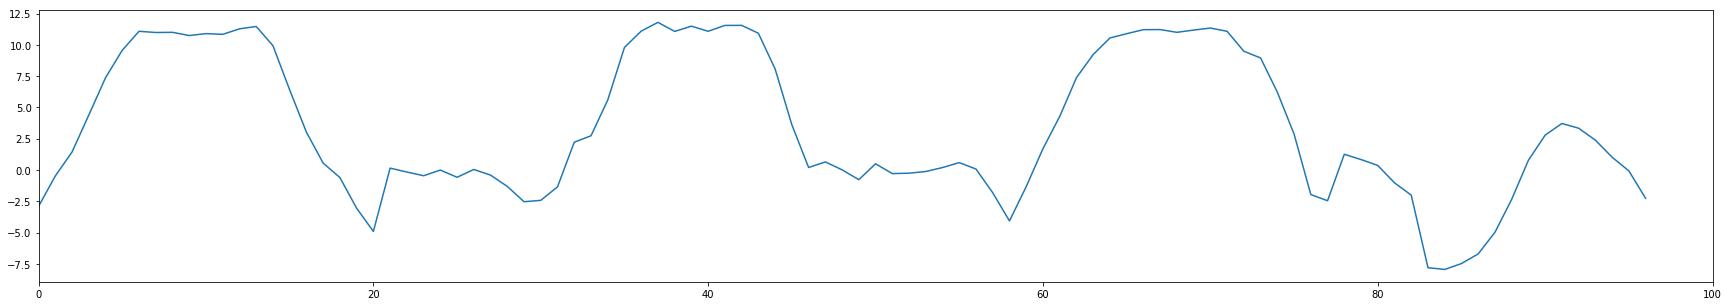

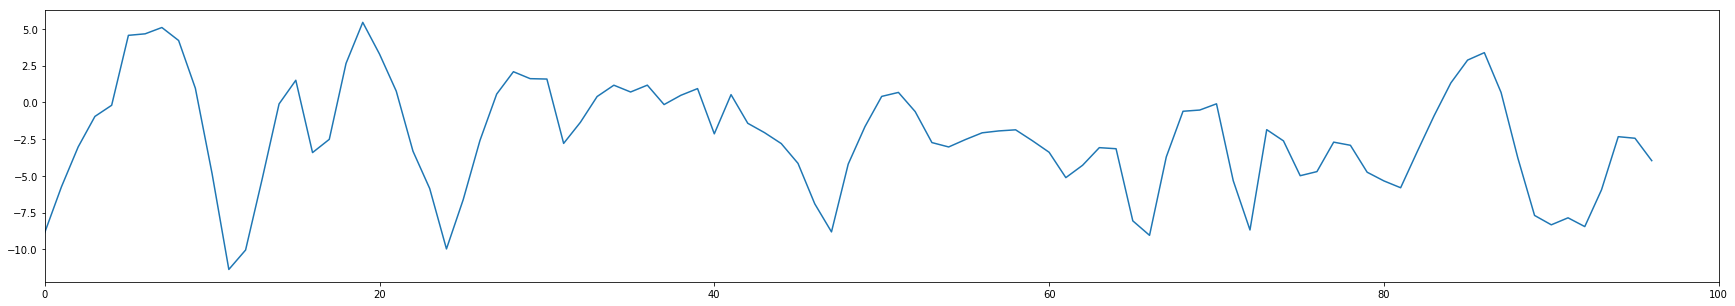

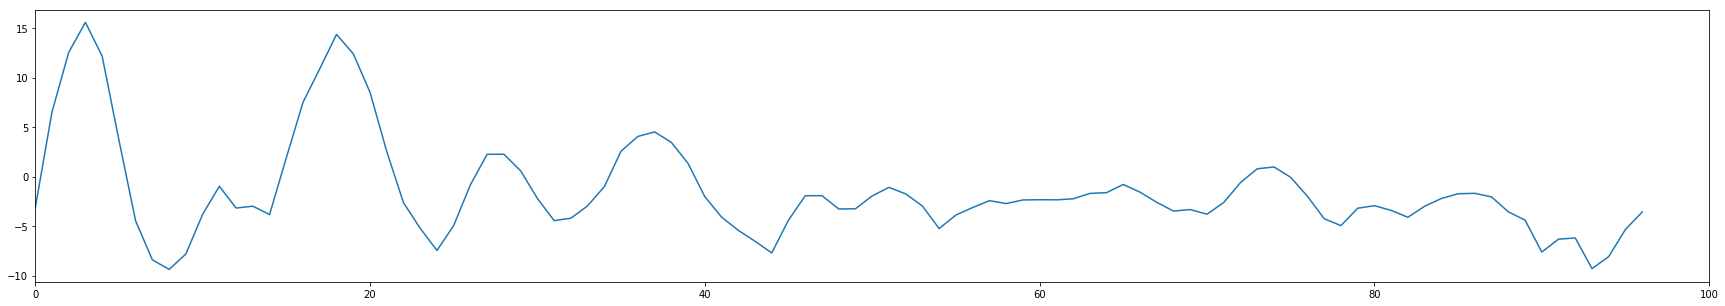

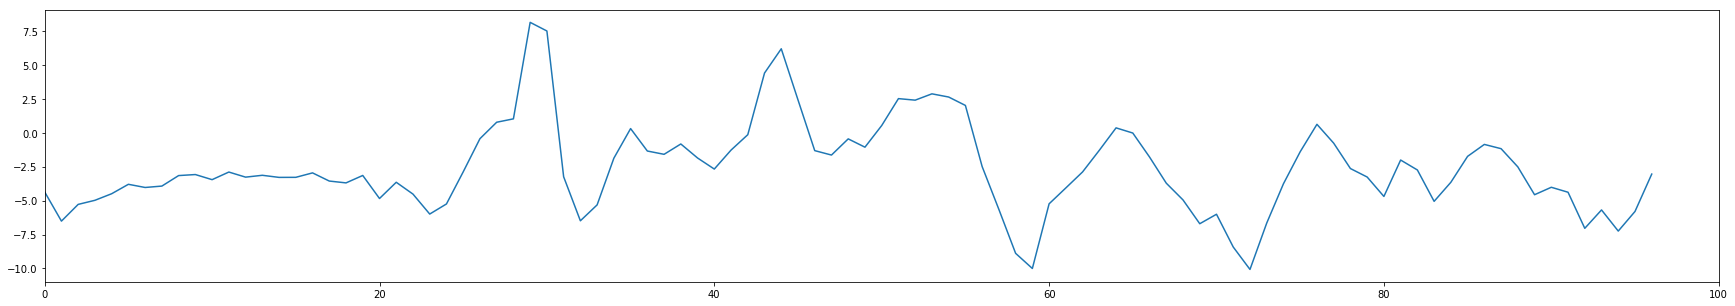

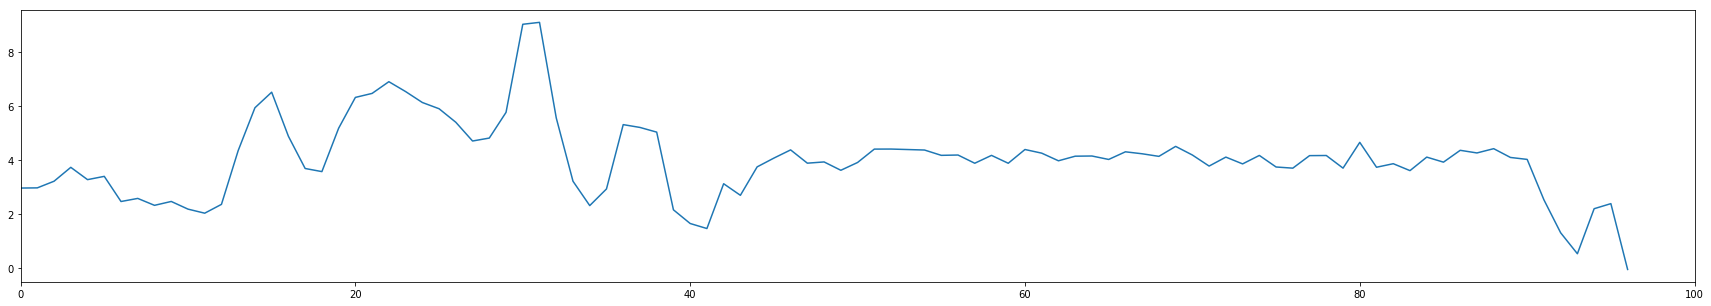

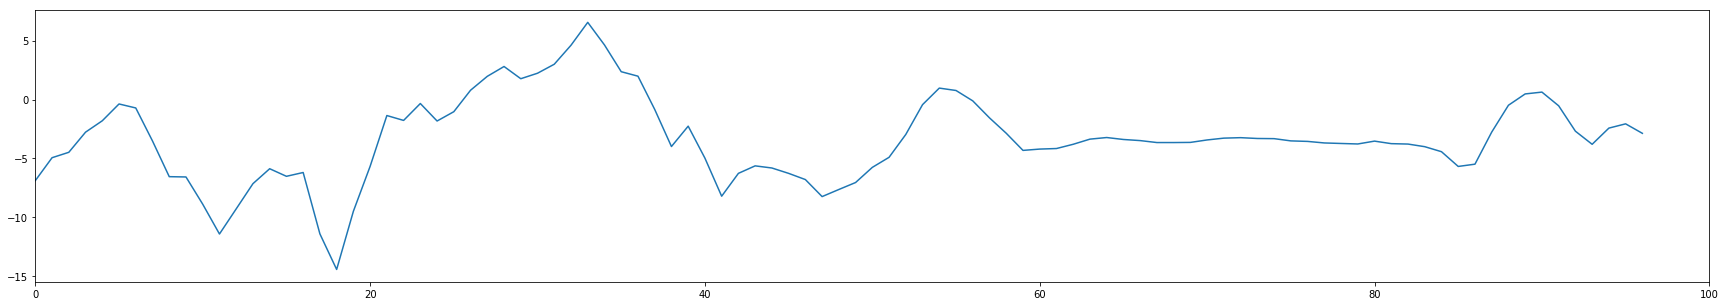

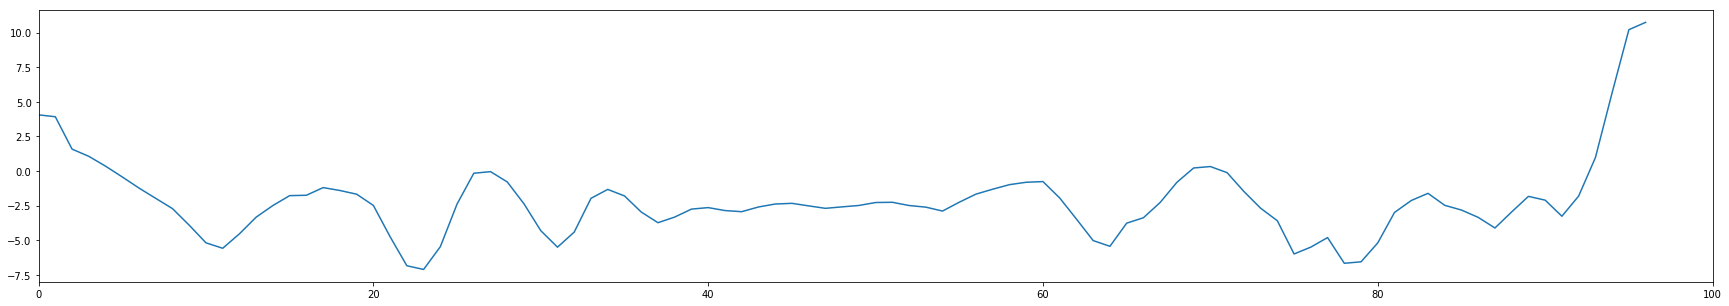

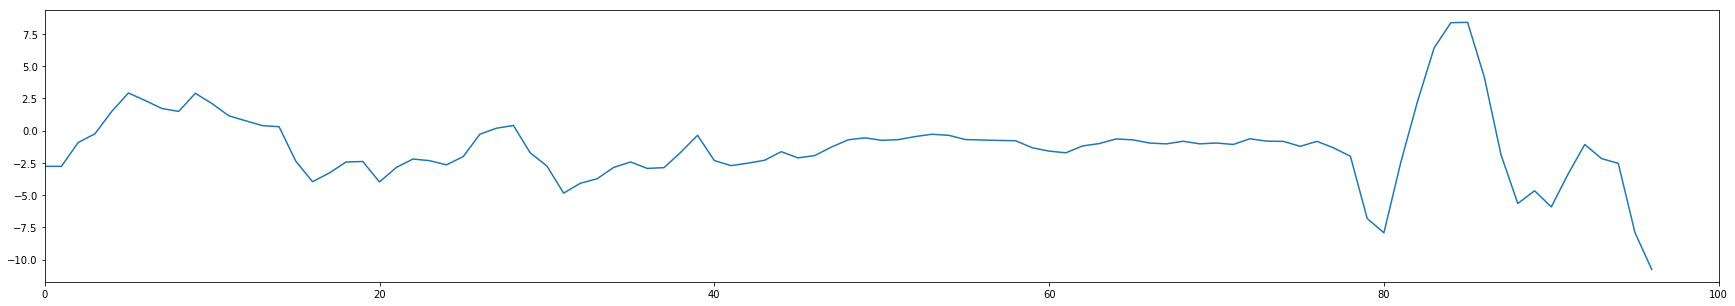

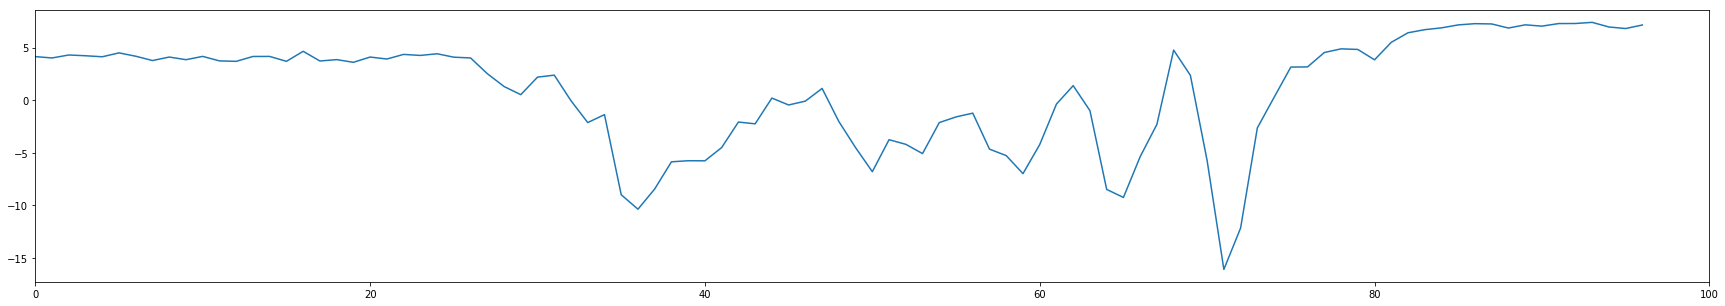

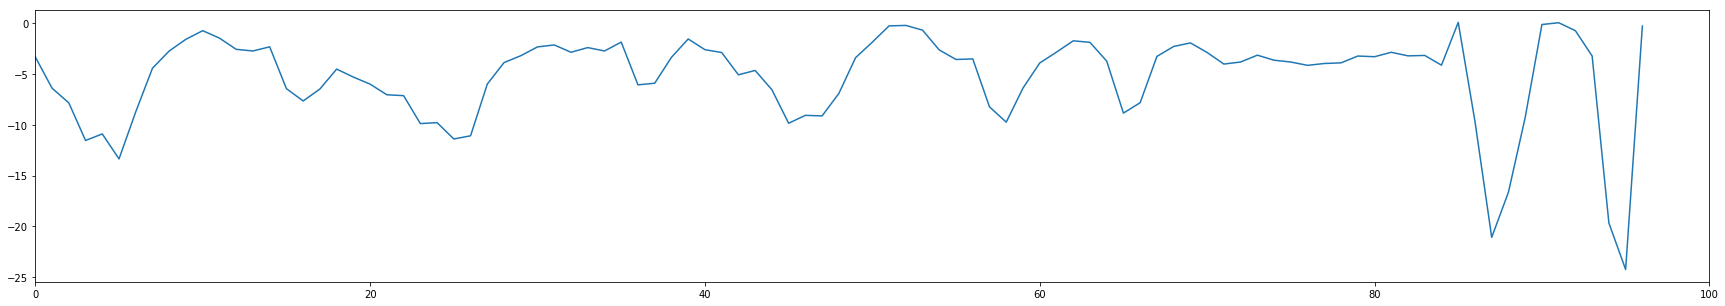

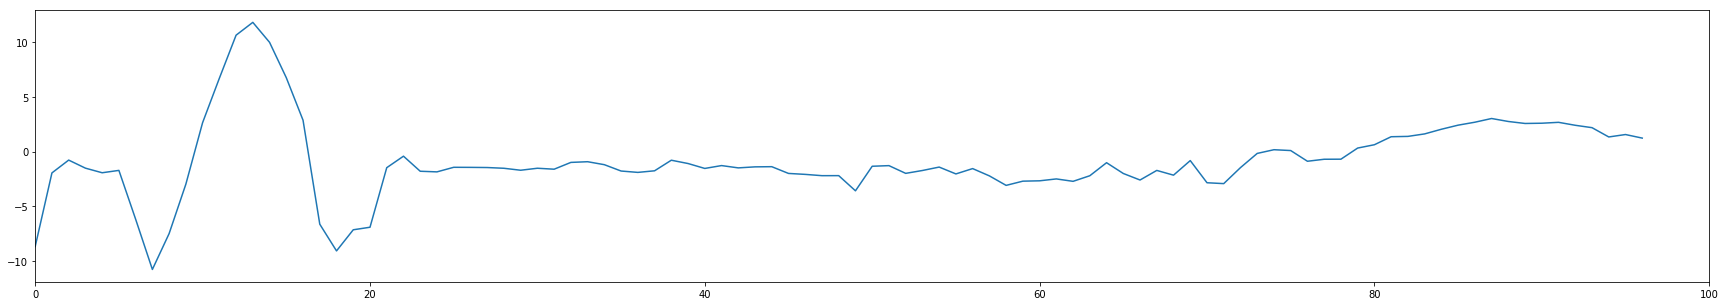

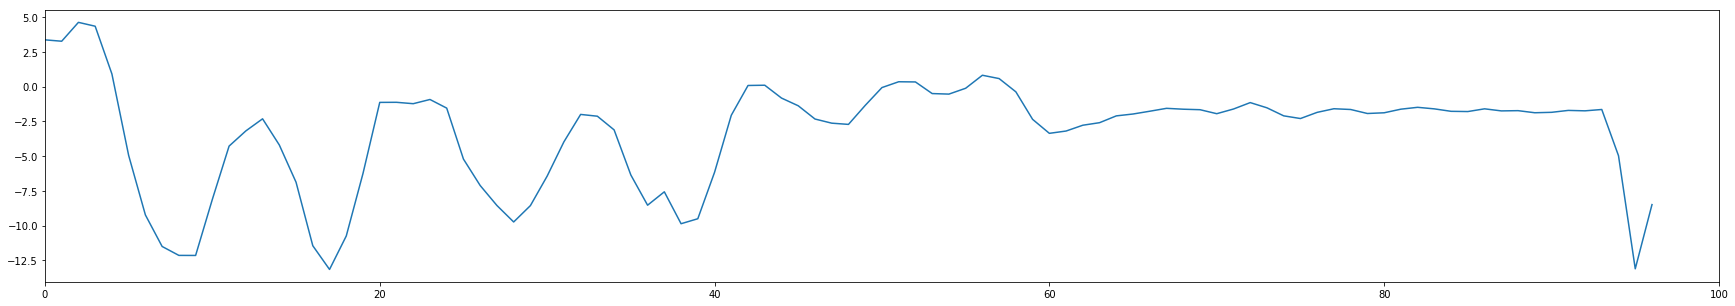

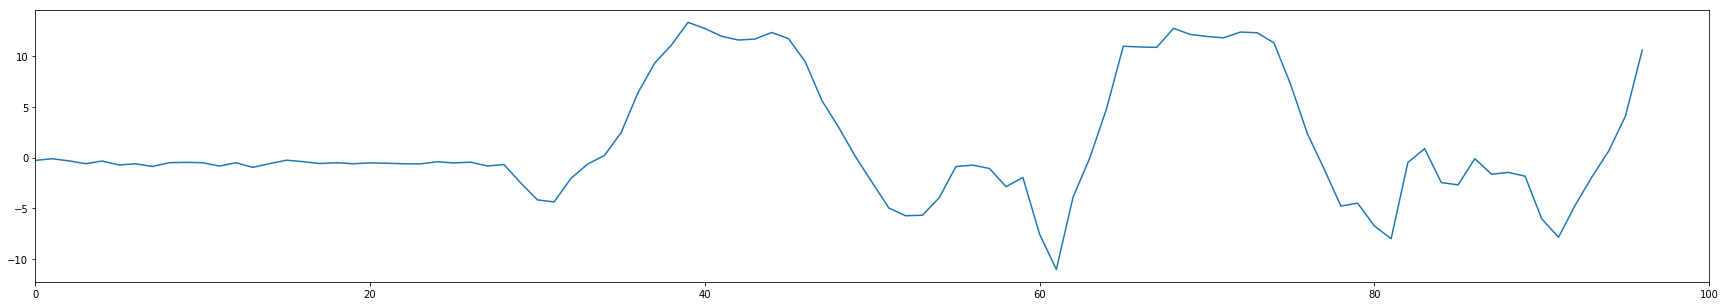

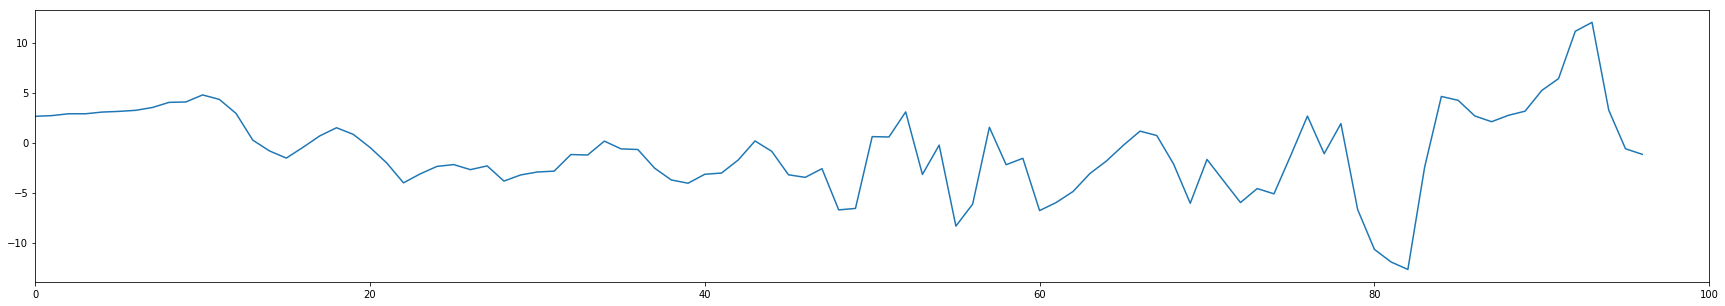

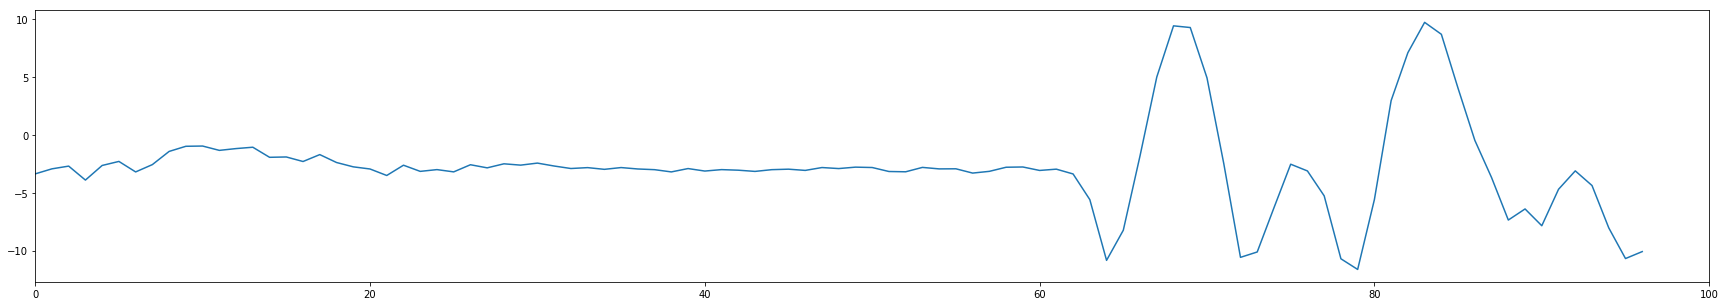

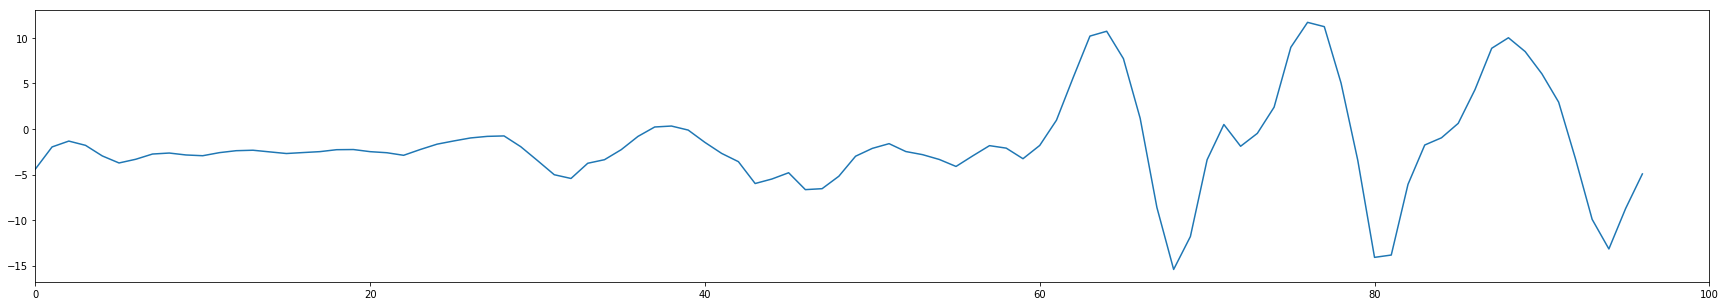

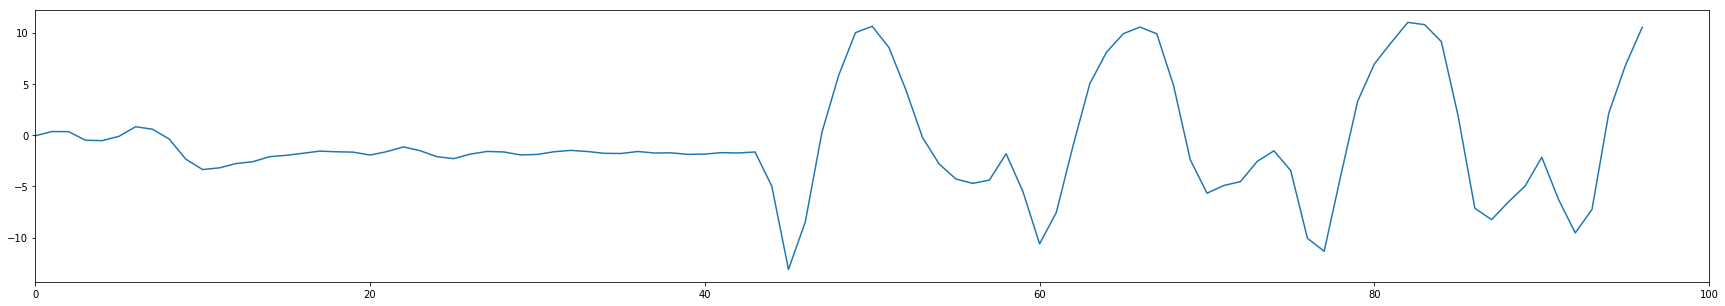

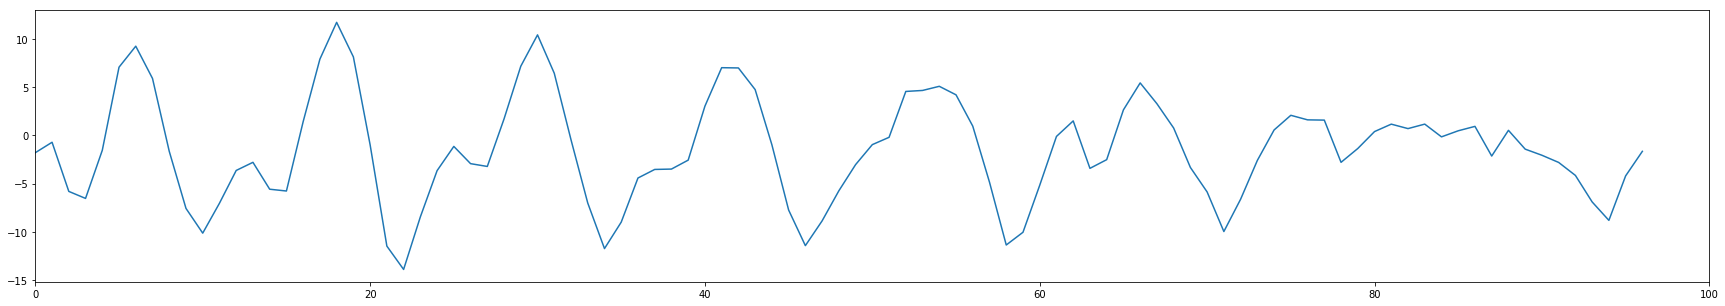

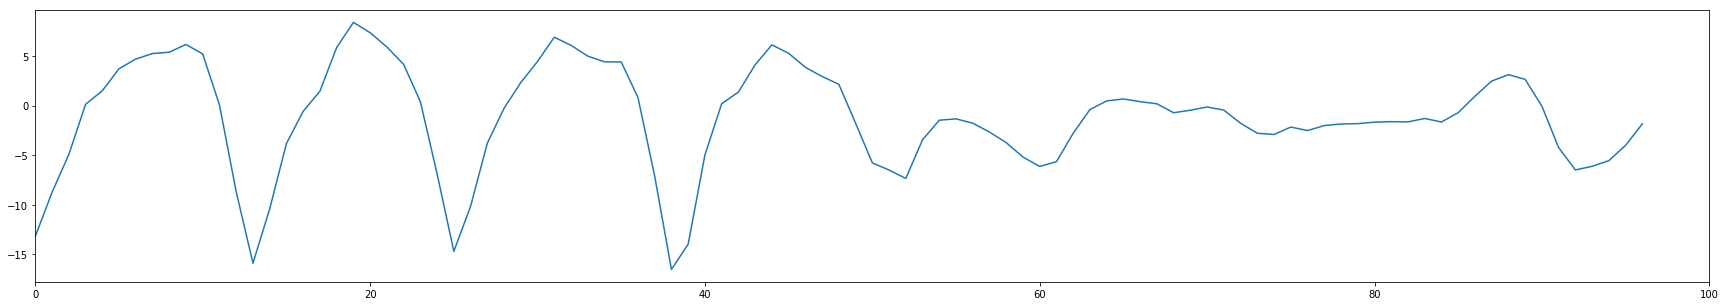

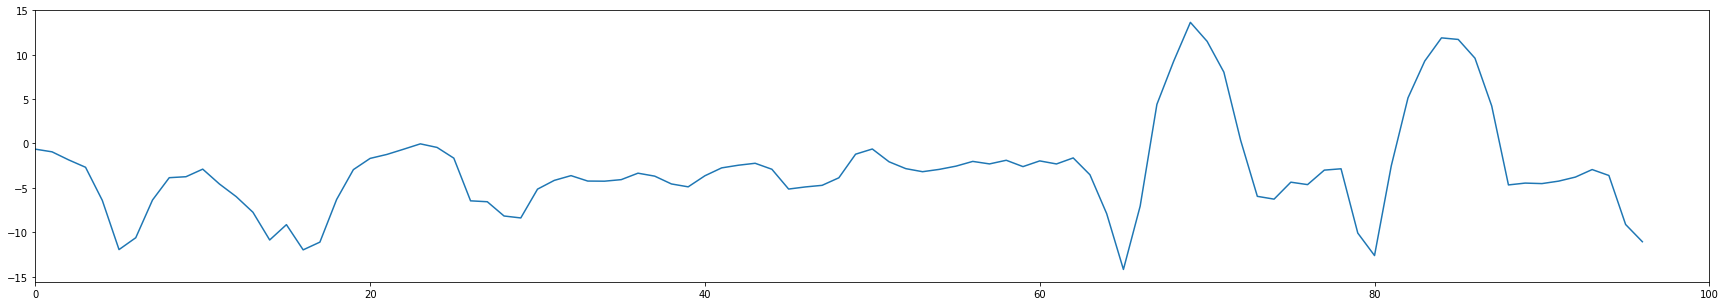

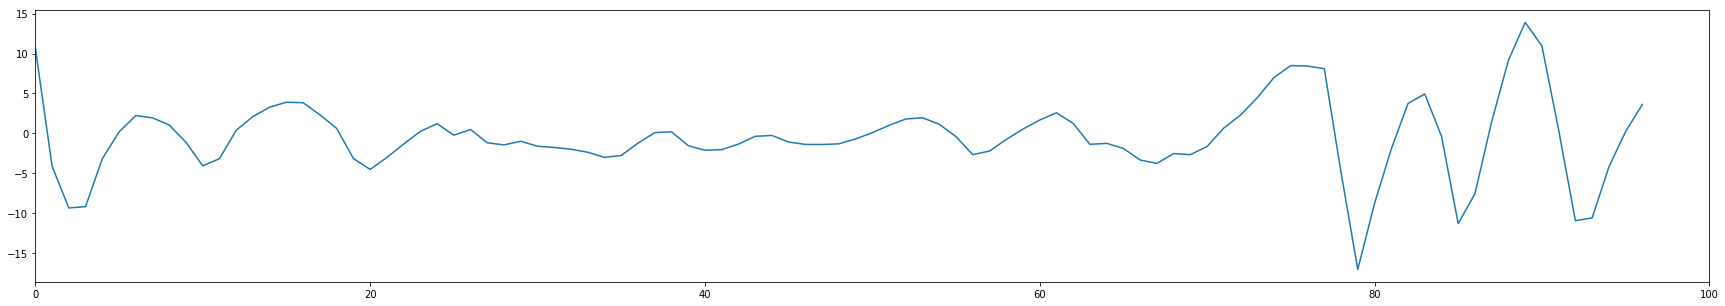

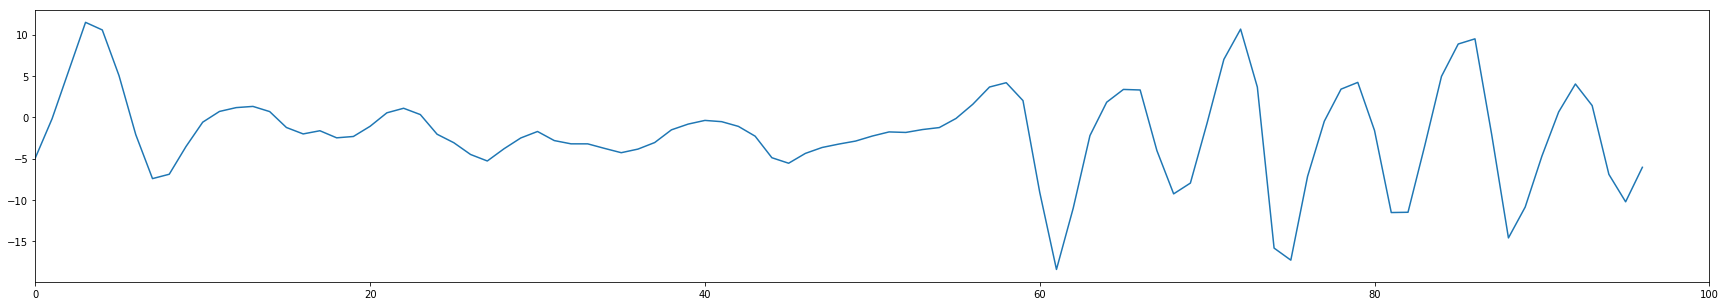

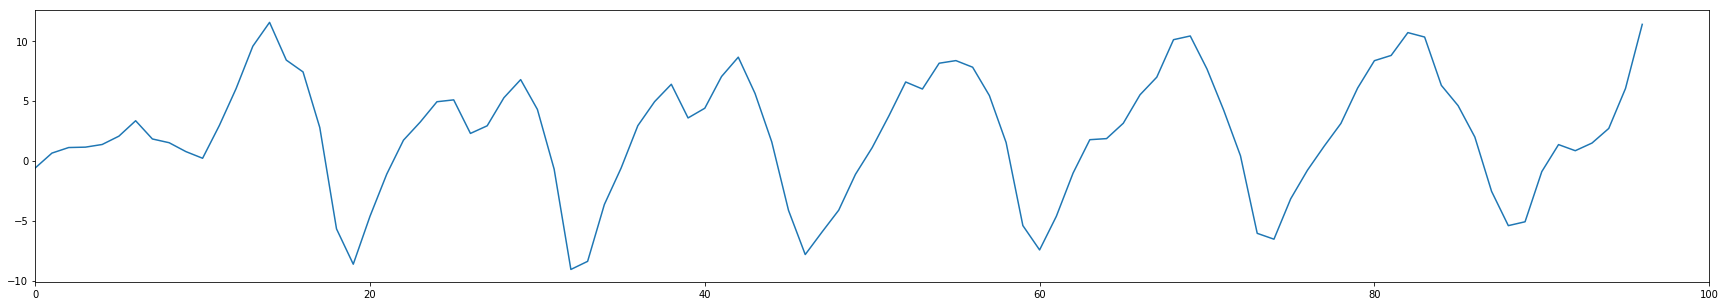

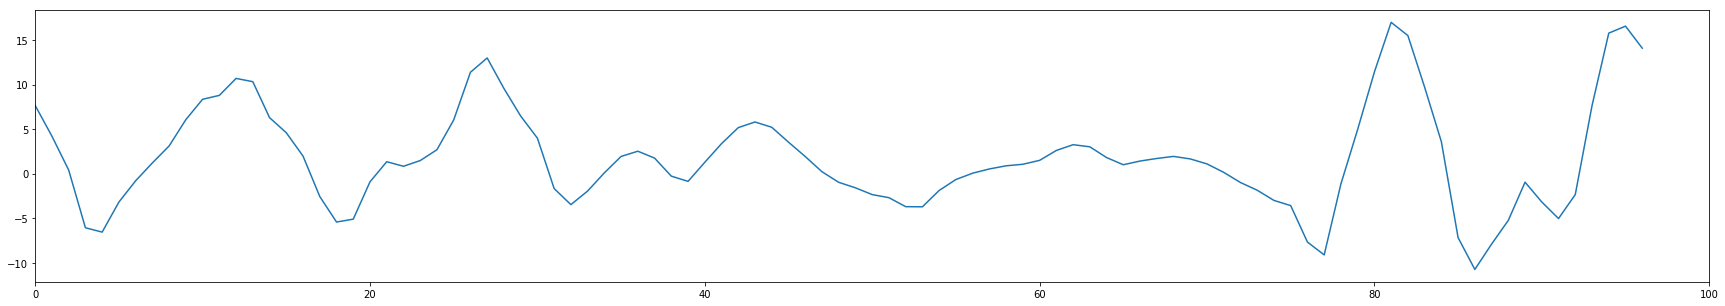

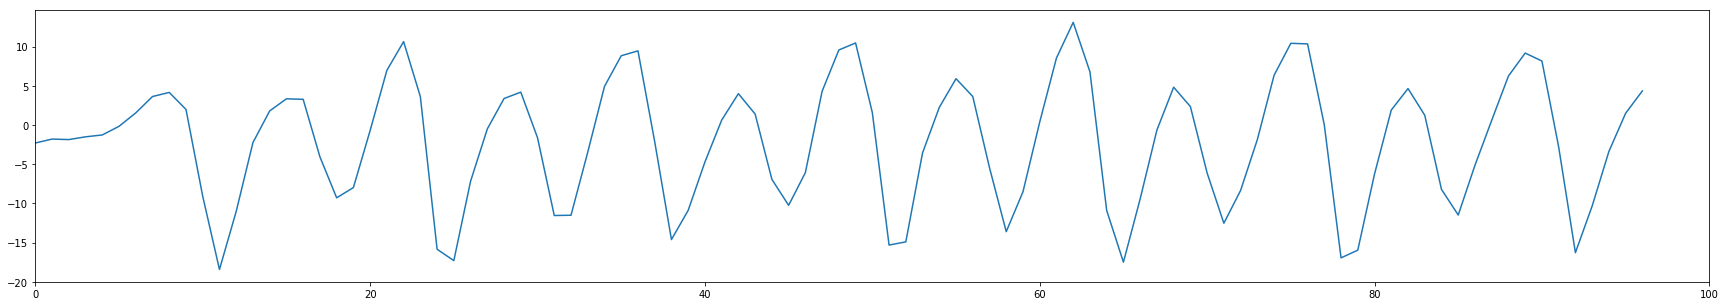

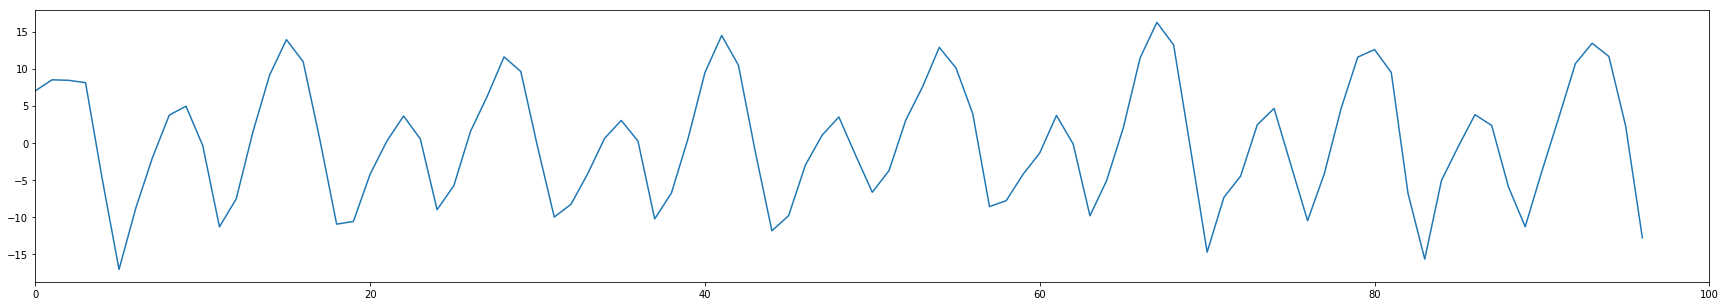

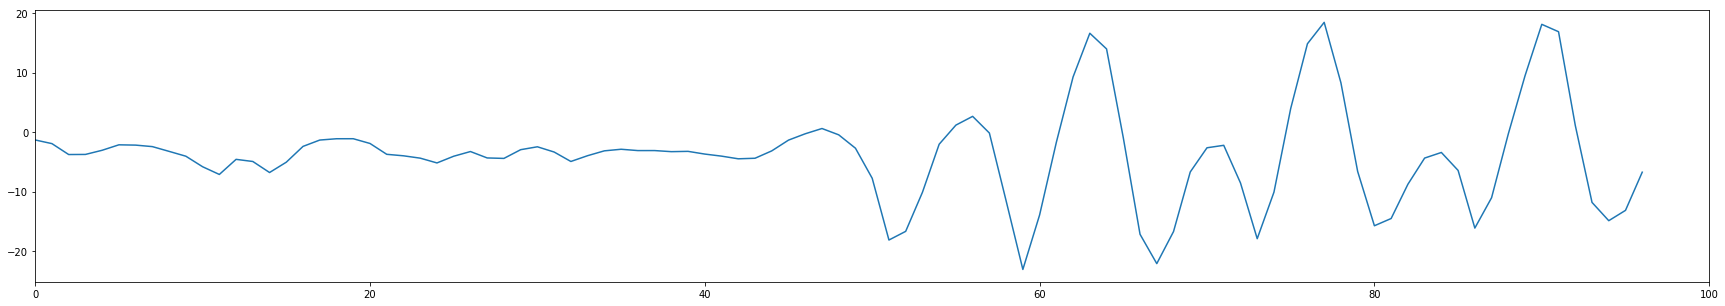

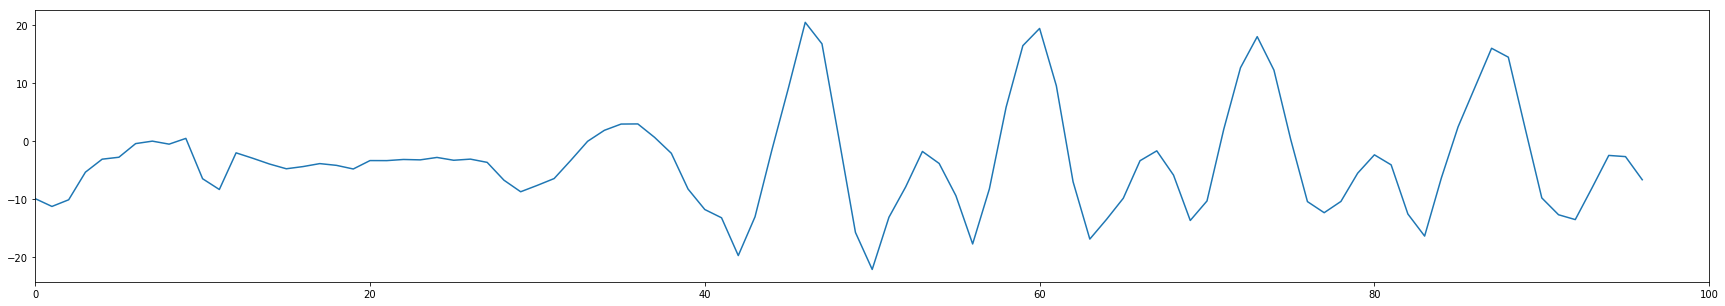

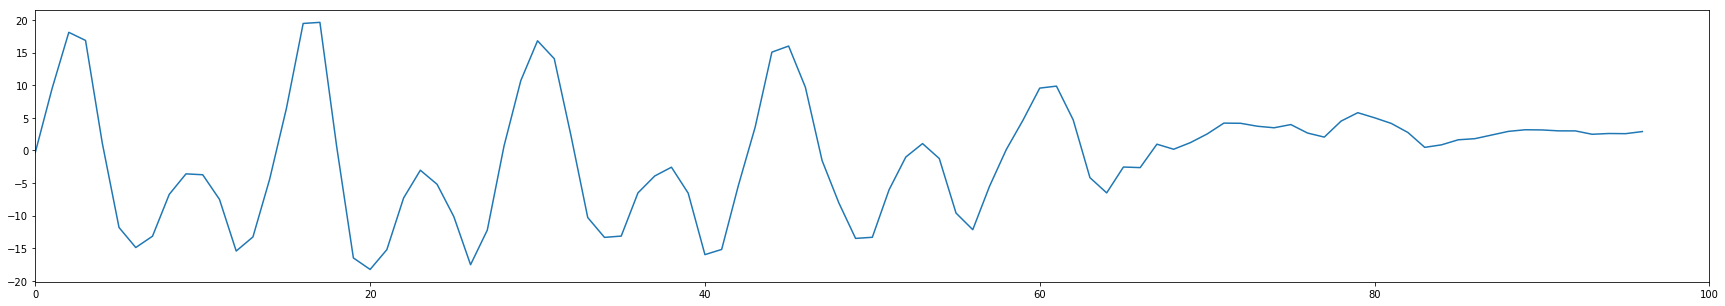

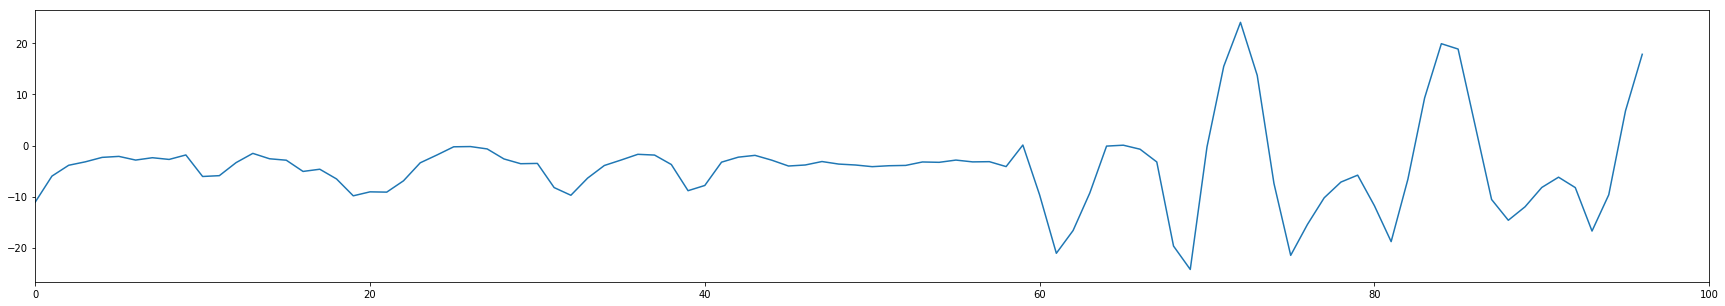

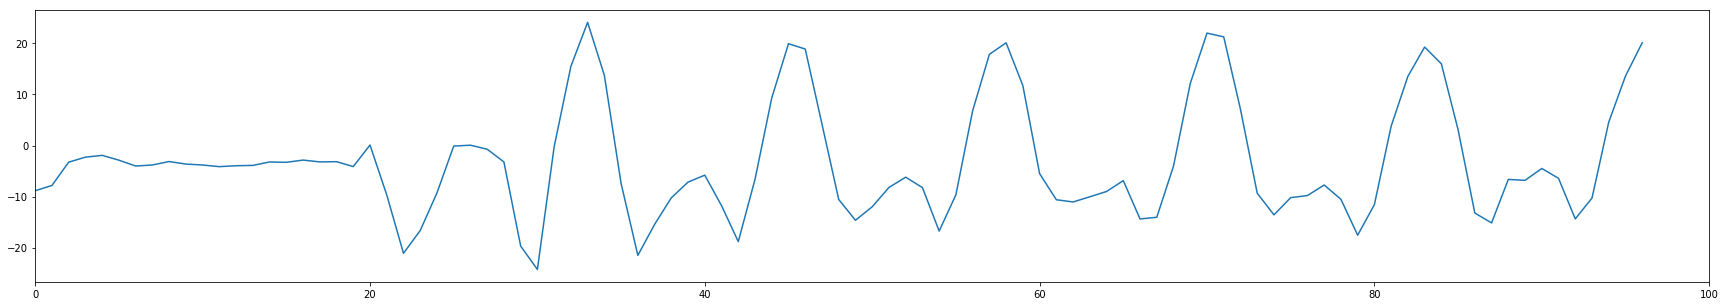

In [356]:
for x in range(0,len(motif_representatives)):
    plt.figure(figsize=(30,5))
    plt.xlim(0,100)
    plt.plot(motif_representatives.values[x,1:])

In [357]:
len(motif_representatives)

71

# ***********Comment out below ************* This part is done in train_3

# Motif frequency calculation (by calculating the distance between the training acceleration and MRs)

In [166]:
from cdtw import pydtw 
discovered_motifs = []
window_size = len(motif_representatives.values[0])
disc_mot_list = [] 
dist = []
for rep in tqdm(motif_representatives.values):

    dist_row = []
    for z in range(0,len(acc)):

        candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
        
        if z<window_size/2:
            candid = acc[0:z+window_size/2].values.reshape(-1)
            
        if z>len(acc)-window_size/2:
            candid = acc[z-window_size/2:len(acc)].values.reshape(-1)

        x = rep.tolist()
        y = candid
        #print len(candid)
        #euclidean_norm = lambda x, y: np.abs(x - y)
        #d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
        #d = dtw.distance_fast(s1, s2)
        d = pydtw.dtw(x,y).get_dist()
        dist_row.extend([d])
        
    dist.append(dist_row)

    #print dist
    #break


100%|██████████| 77/77 [09:22<00:00,  7.42s/it]

In [167]:
norm_dist = []
for rows in dist:
    norm_dist.append(rows/np.array(rows).max())

In [168]:
disc_mot = []
for rows in norm_dist:
    disc_mot_row = []
    for elements in rows:
        if elements < 0.15:
            disc_mot_row.extend([1])
        else:
            disc_mot_row.extend([0])
    disc_mot.append(disc_mot_row)

In [169]:
len(disc_mot[0])

20003

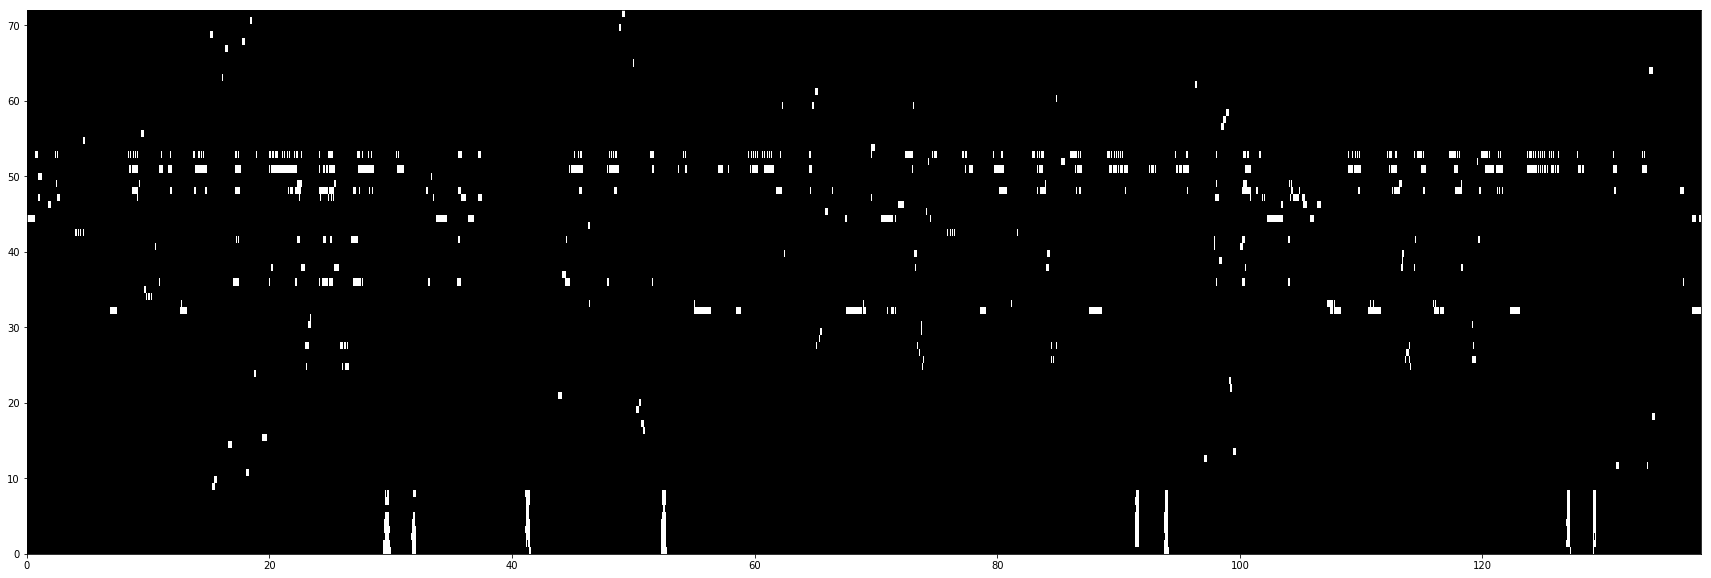

In [406]:
plt.figure(figsize=(30,10))
plt.imshow(disc_mot, cmap='gray', interpolation='nearest', origin='lower', extent=[0,len(dist[0]),0,len(motif_representatives.values)], aspect='auto')

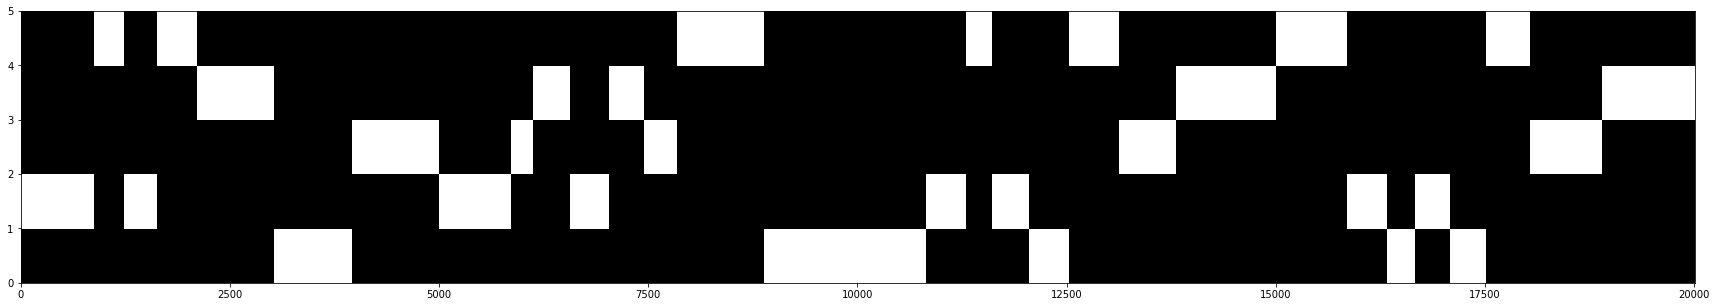

In [408]:
plt.figure(figsize=(30,5))
plt.imshow(place,cmap='gray', interpolation='nearest', origin='lower', extent=[0,len(location_list),0,len(place)], aspect='auto')
plt.show()

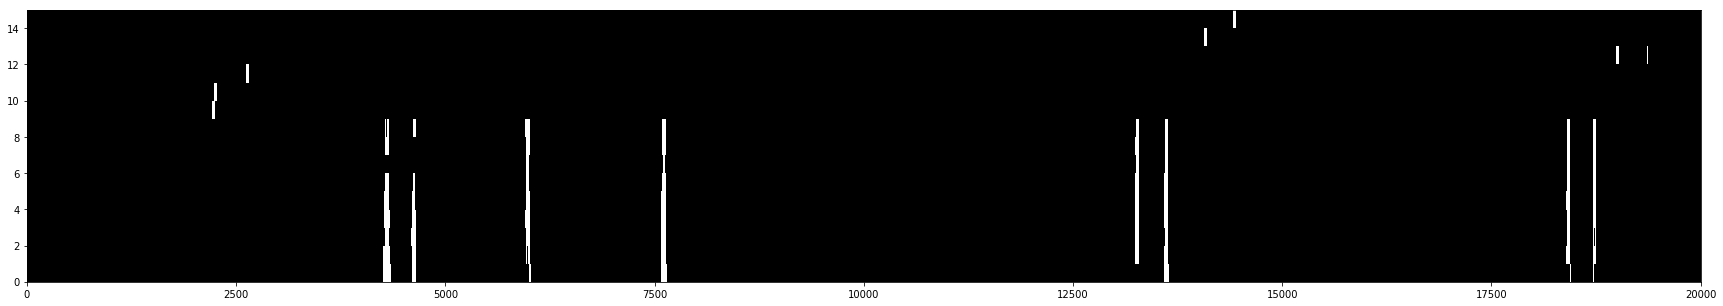

In [409]:
plt.figure(figsize=(30,5))
plt.imshow(disc_mot[0:15],cmap='gray', interpolation='nearest', origin='lower', extent=[0,len(location_list),0,len(disc_mot[0:15])], aspect='auto')
plt.show()

MR_id:  0


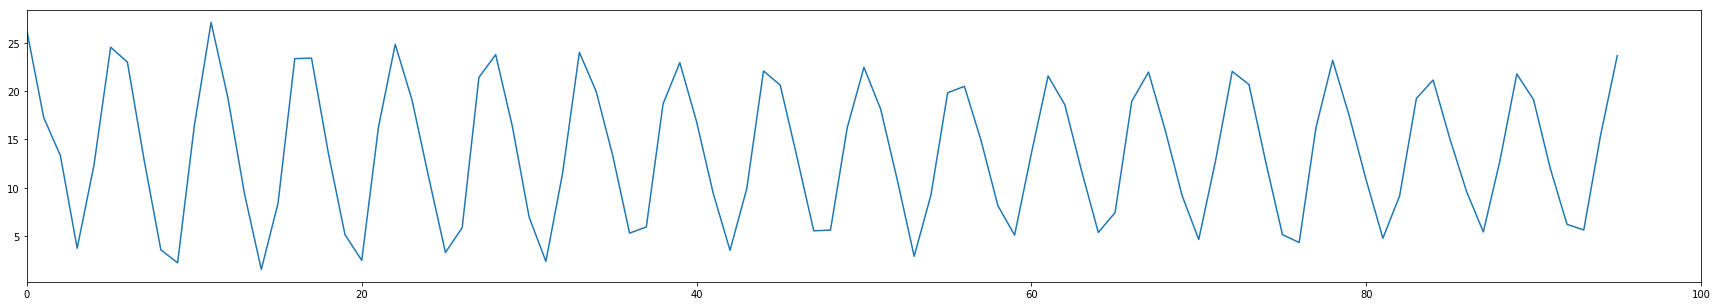

MR_id:  1


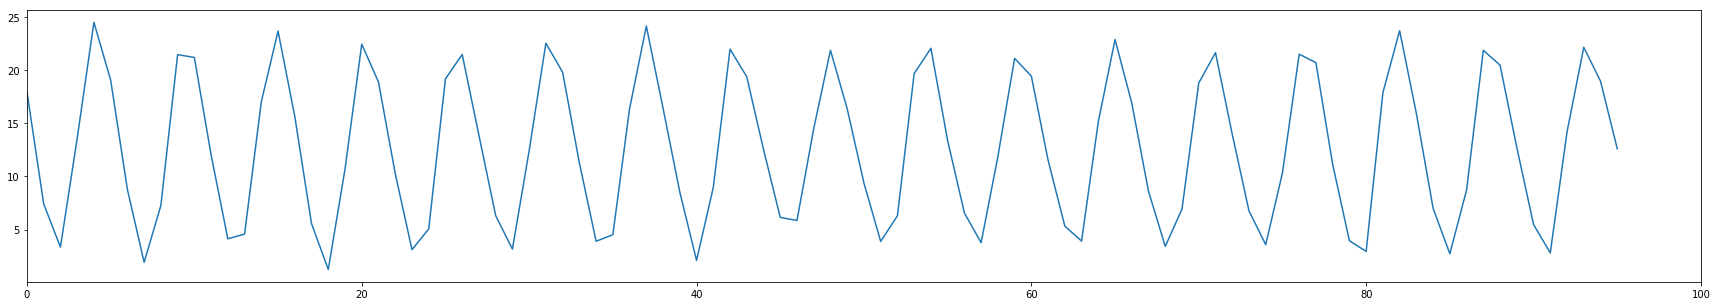

MR_id:  2


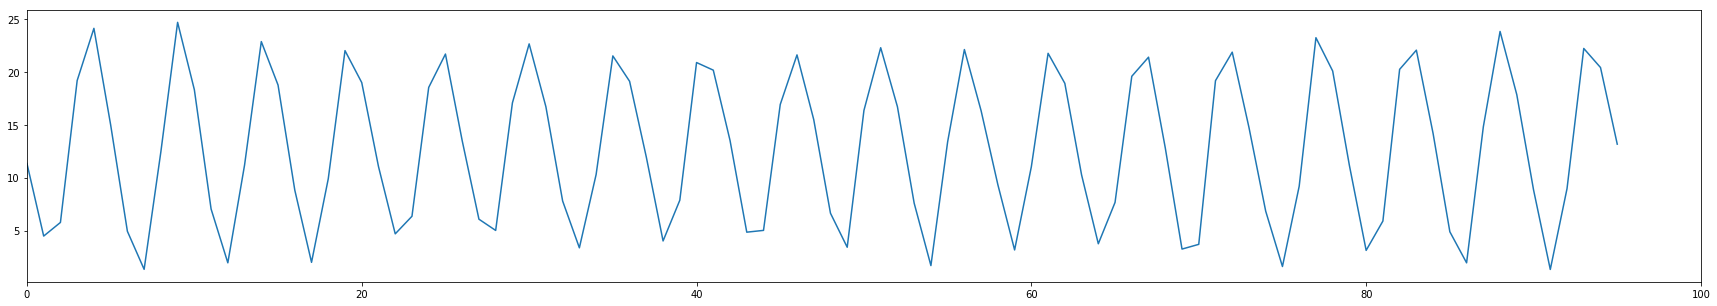

MR_id:  3


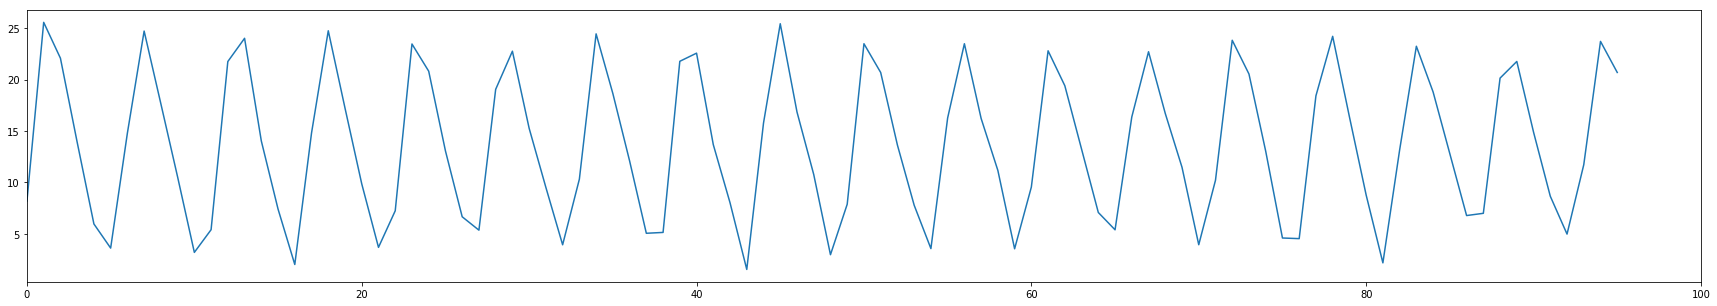

MR_id:  4


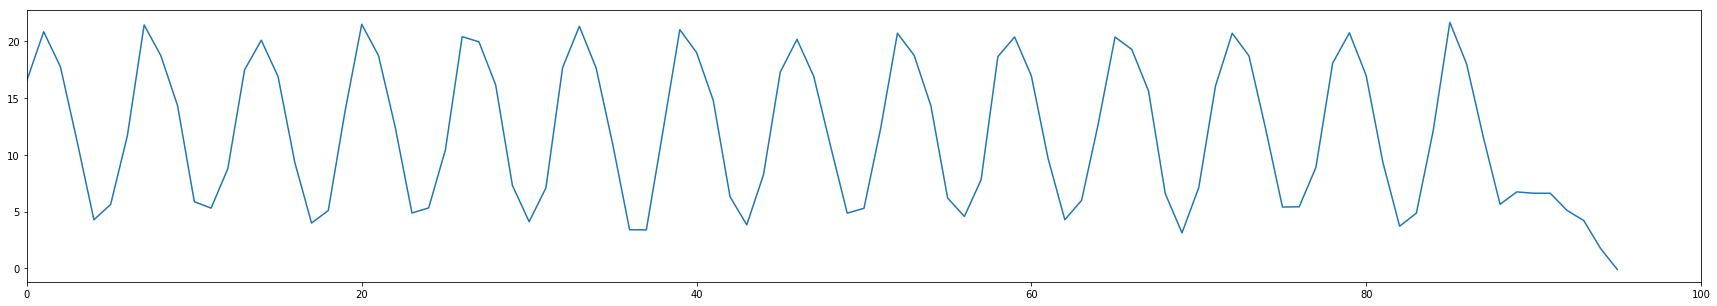

MR_id:  5


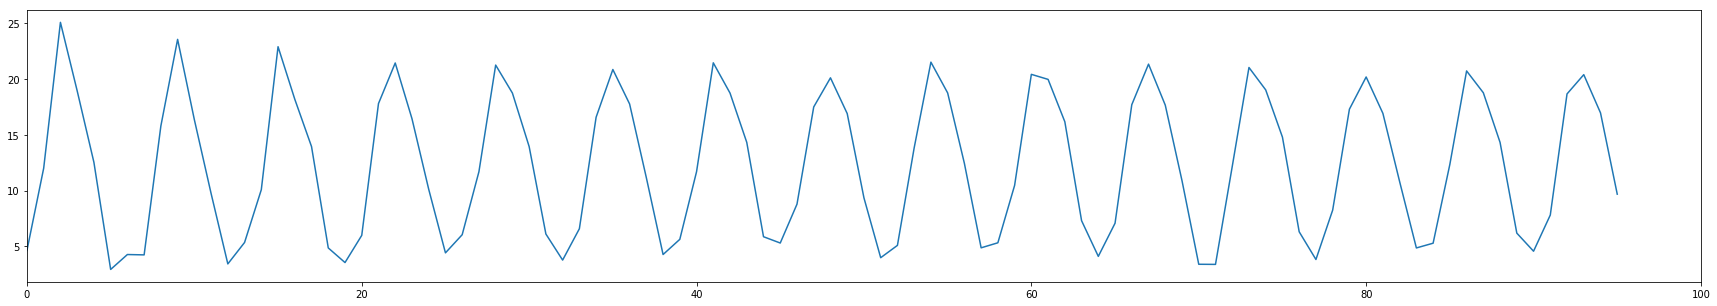

MR_id:  6


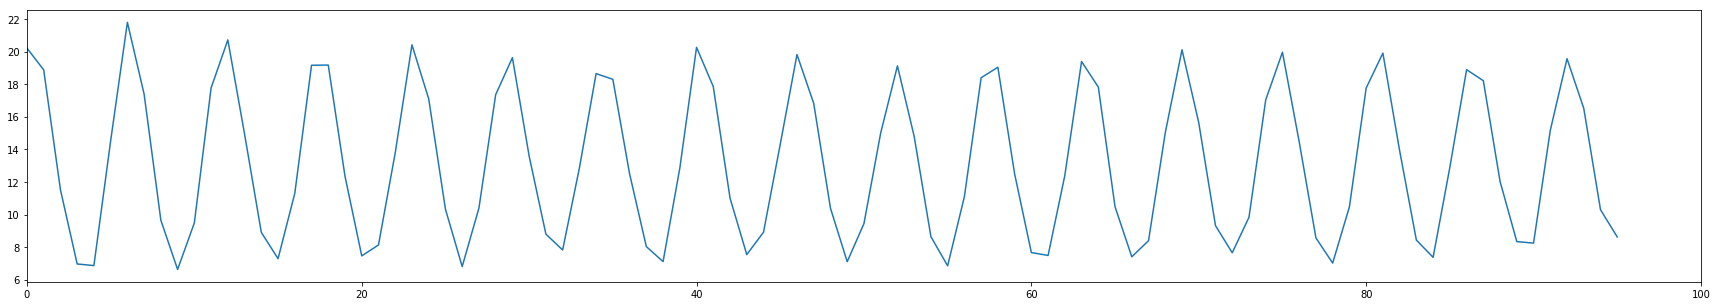

MR_id:  7


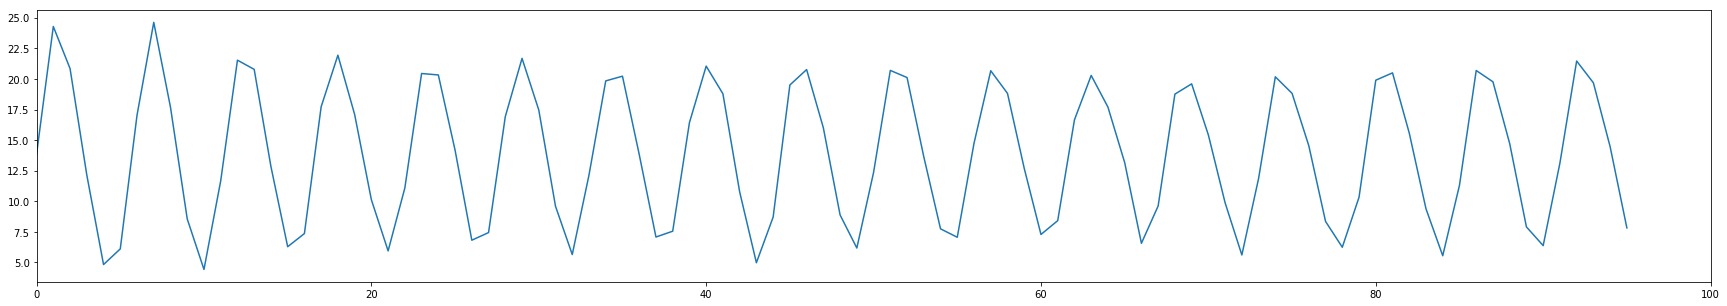

MR_id:  8


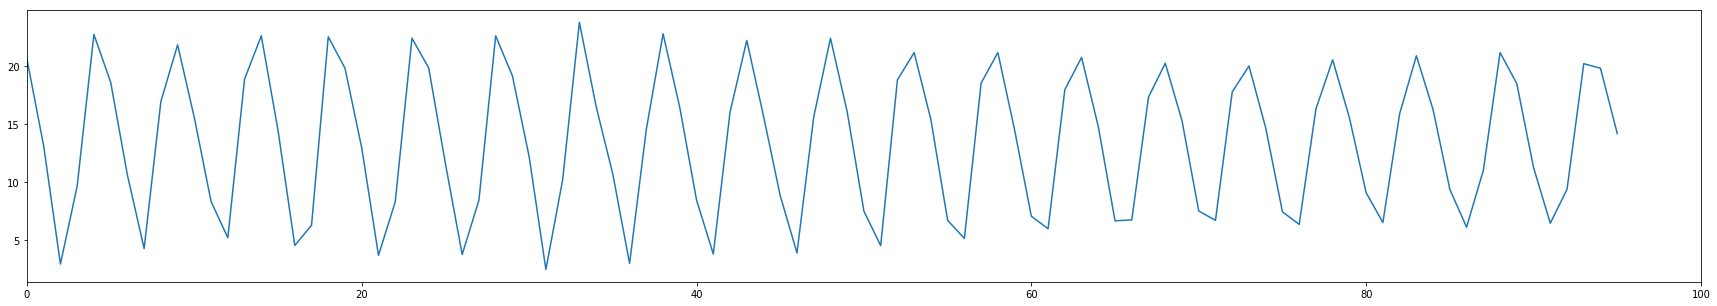

MR_id:  9


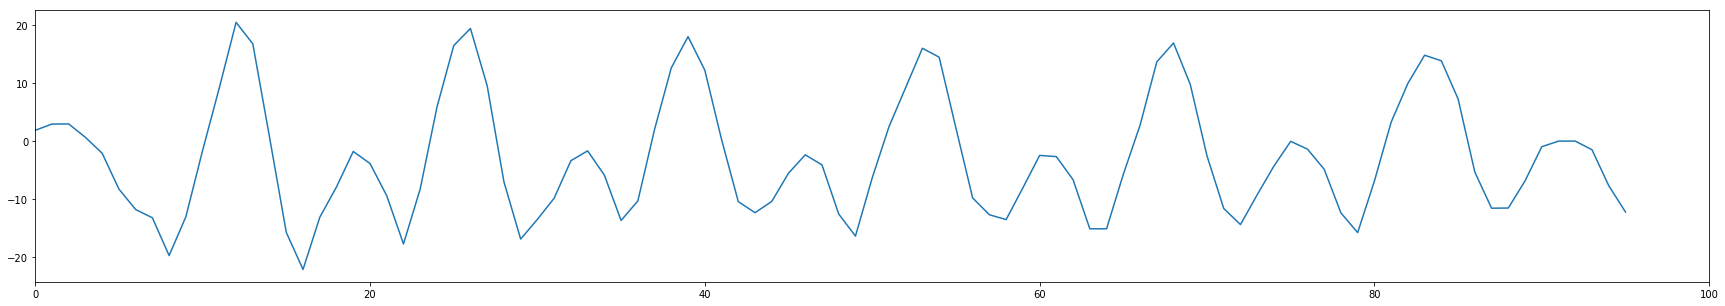

MR_id:  10


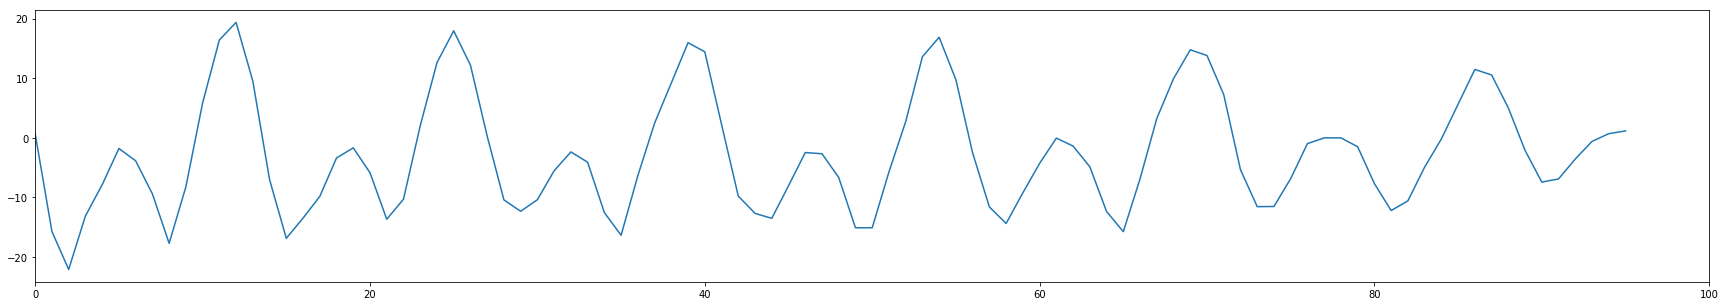

MR_id:  11


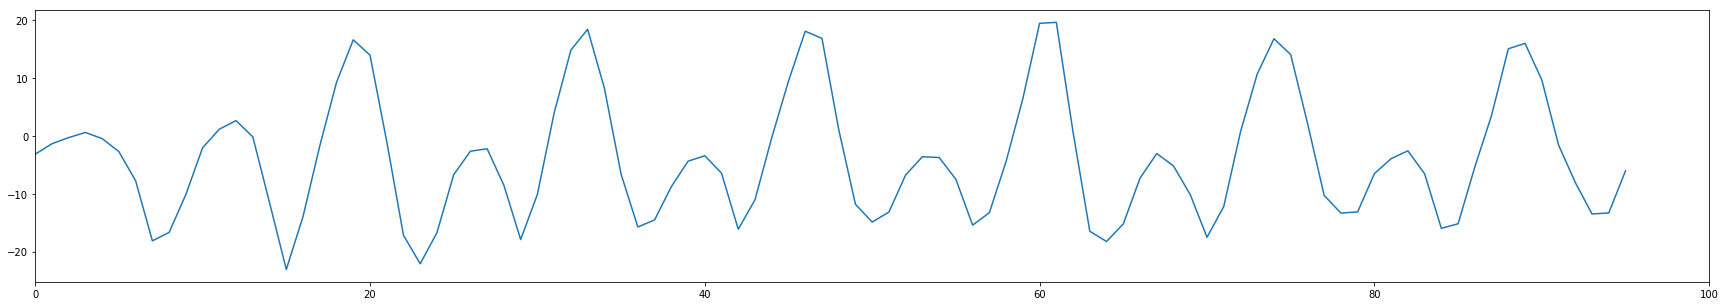

MR_id:  12


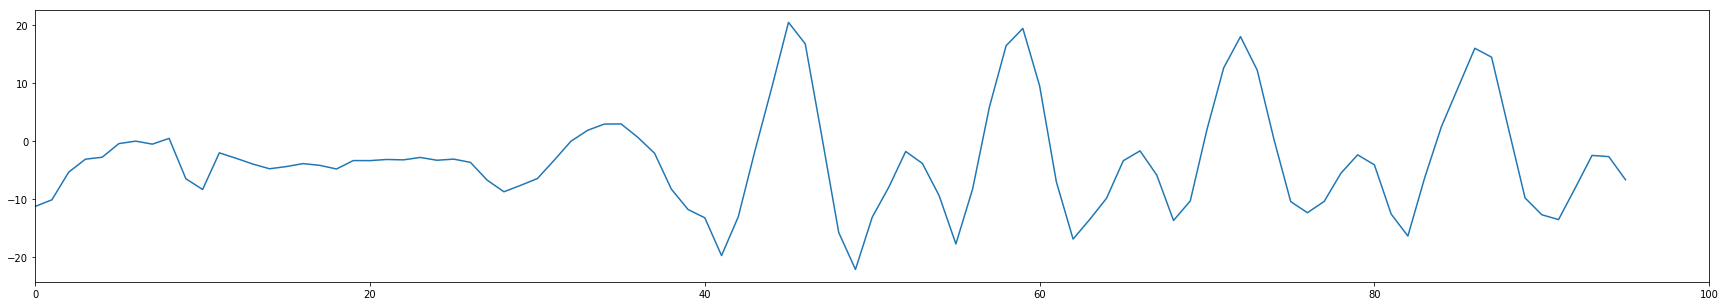

MR_id:  13


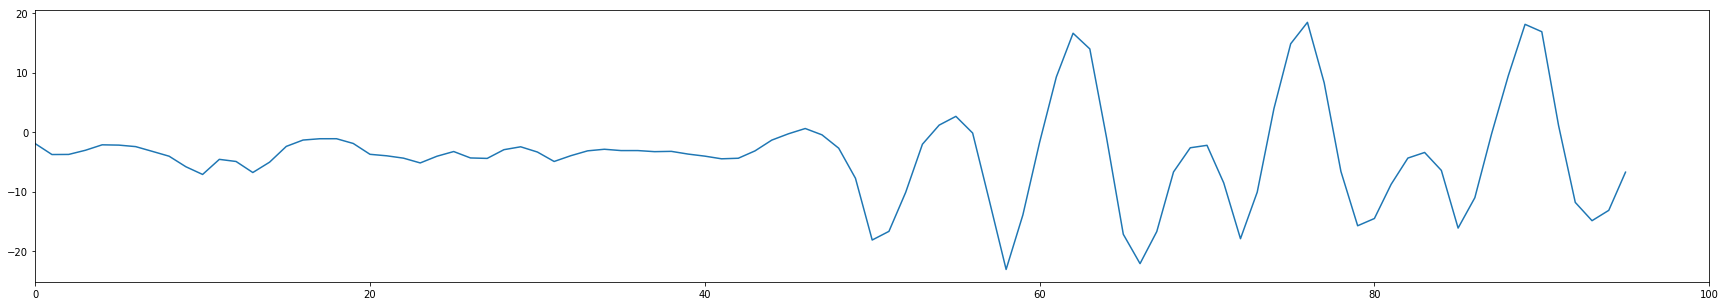

MR_id:  14


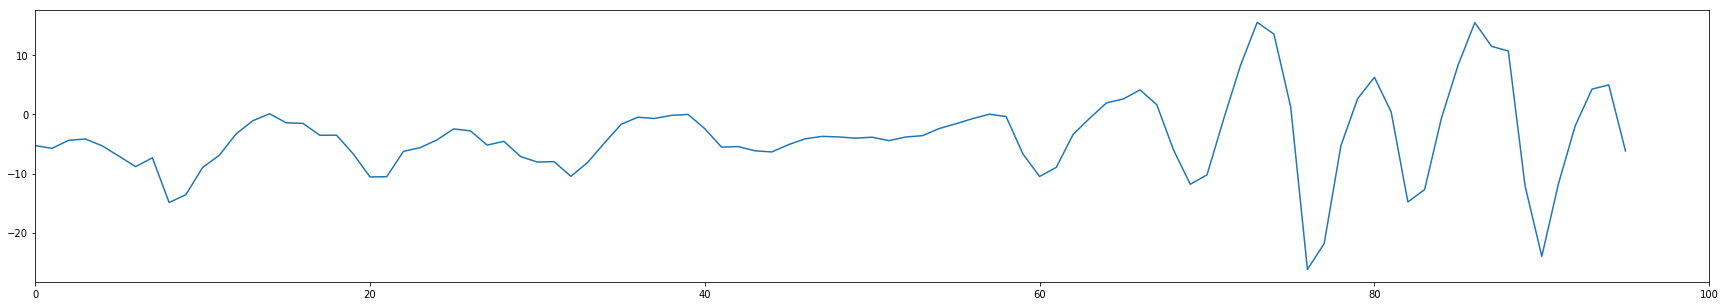

MR_id:  15


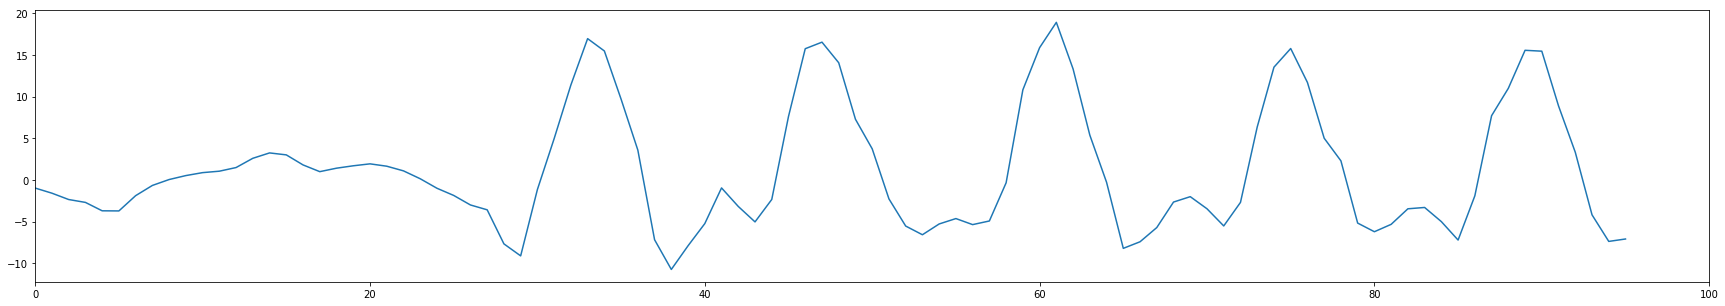

MR_id:  16


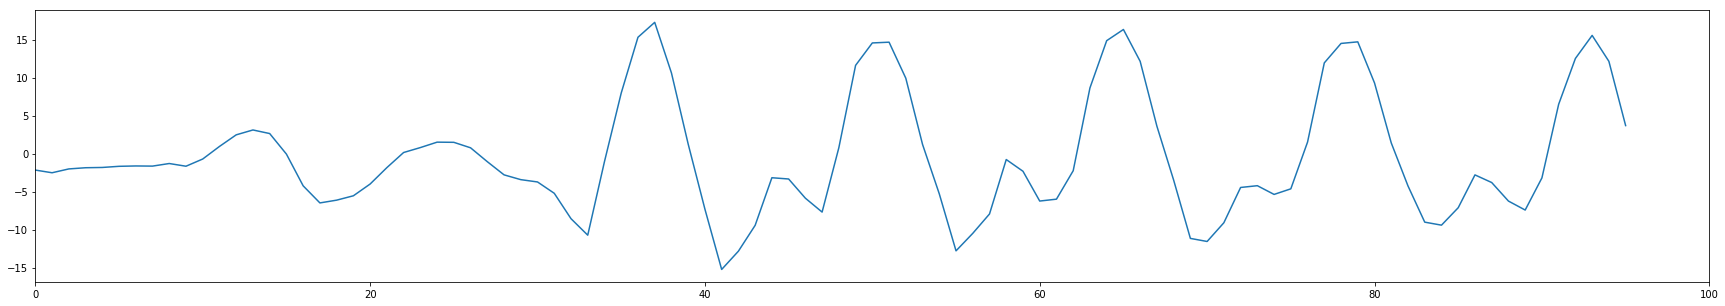

MR_id:  17


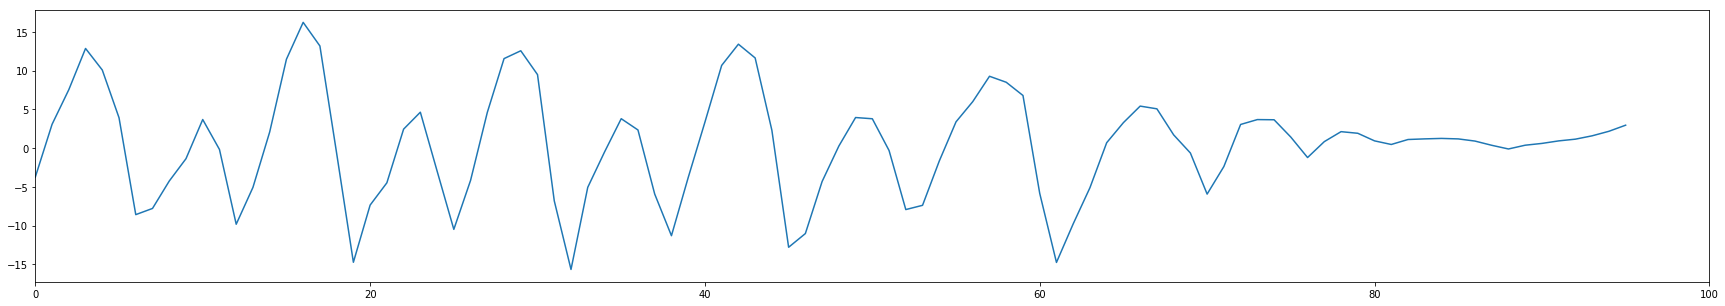

MR_id:  18


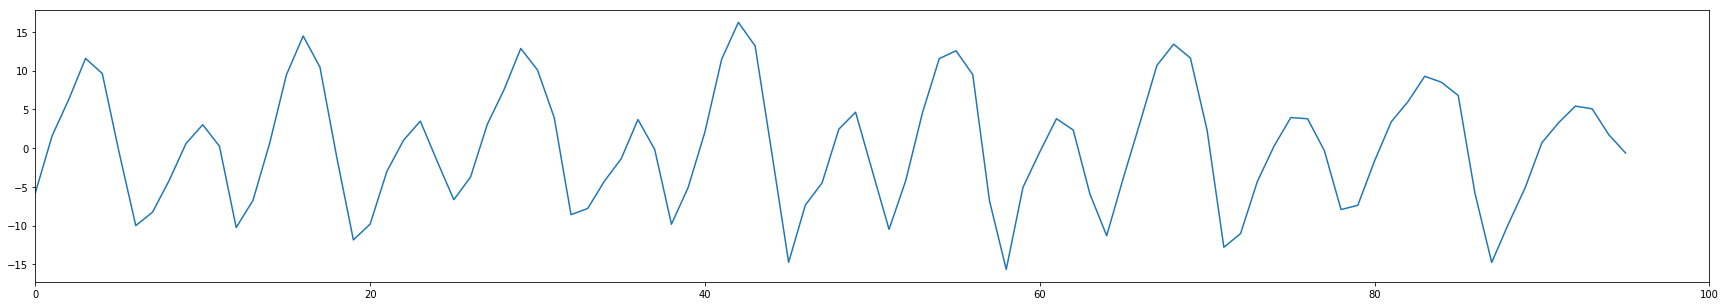

MR_id:  19


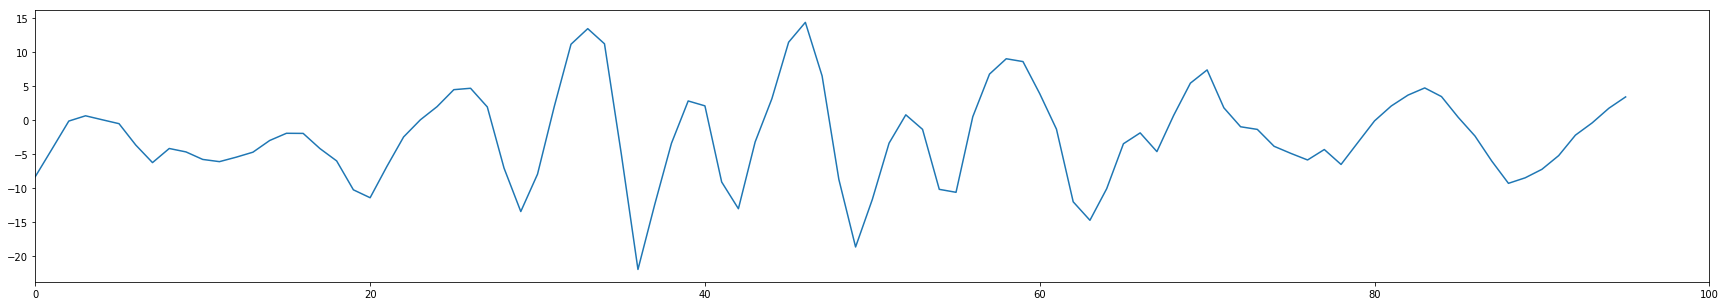

MR_id:  20


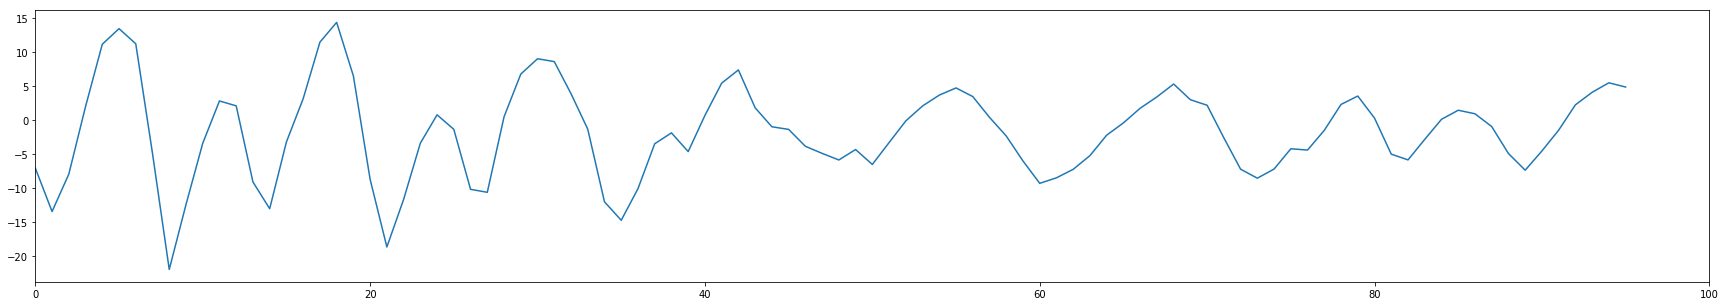

In [411]:
for x in range(0,21):    
    plt.figure(figsize=(30,5))
    plt.xlim(0,100)
    plt.plot(motif_representatives.values[x,1:])   
    print "MR_id: ", x
    plt.show()

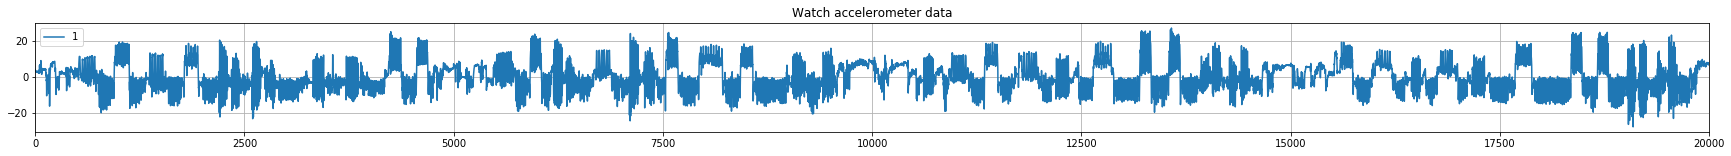

In [206]:
acc.plot(figsize = (30,2),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])

In [ ]:
np.where(location_list.values==2)[0]

In [ ]:
ax = df1.plot()
df2.plot(ax=ax)

location_list

In [205]:
np.where(location_list.values==2)[0]

(3232,)

In [172]:
place_cluster = location_list
place_cluster = place_cluster.values.reshape(-1).tolist()
places = set(place_cluster)

place = []
for p in tqdm(places):
    loc = []
    for c in place_cluster:
        if p == c:
            loc.append(1)
        else:
            loc.append(0)
    place.append(loc)
            

print places


100%|██████████| 5/5 [00:00<00:00, 259.48it/s]

set([0, 1, 2, 3, 4])


In [175]:
acc

1
0      4.153605
1      3.889403
2      3.697325
3      3.399065
4      3.426182
5      3.317291
6      3.060173
7      3.304810
8      3.127418
9      3.051782
10     2.989814
11     3.000736
12     3.002801
13     3.171703
14     3.068140
15     2.928619
16     2.773923
17     2.739291
18     2.820464
19     2.786500
20     2.762202
21     2.810502
22     2.675120
23     2.858403
24     2.852674
25     2.877527
26     2.856010
27     3.072524
28     3.067331
29     2.983975
...         ...
19973  7.633321
19974  7.650408
19975  7.409011
19976  7.257383
19977  8.086709
19978  7.689932
19979  7.096376
19980  6.982957
19981  7.276780
19982  7.097748
19983  7.400450
19984  7.288375
19985  7.146086
19986  7.141436
19987  7.485314
19988  7.433238
19989  7.202907
19990  6.866378
19991  6.858965
19992  7.183738
19993  7.470278
19994  7.409782
19995  7.474928
19996  7.445269
19997  7.778416
19998  7.629545
19999  7.772129
20000  7.495267
20001  7.846593
20002  6.756504

[20003 rows x 1 columns]

In [176]:
len(disc_mot[0])

20003

In [177]:
feat = []
mot_sum = 0
for location in range(0,len(place)):
    for row in range(0,len(disc_mot)):
        count = 0
        for element in range(0,len(place[location])):
            if place[location][element] == 1:
                if disc_mot[row][element] == 1:
                    count = count+1
        feat.append([location,row,count])

In [178]:
feature_list = []
for f in feat:

    feature_list.append([f[0],f[1],float(f[2])])
#feature_list.append(ft)

In [179]:
feature_list = pd.DataFrame(feature_list)

In [180]:
feature_list

0   1      2
0    0   0    0.0
1    0   1    0.0
2    0   2    0.0
3    0   3    0.0
4    0   4    0.0
5    0   5    0.0
6    0   6    0.0
7    0   7    0.0
8    0   8    0.0
9    0   9    0.0
10   0  10    0.0
11   0  11    0.0
12   0  12    0.0
13   0  13    0.0
14   0  14    0.0
15   0  15    0.0
16   0  16    0.0
17   0  17    0.0
18   0  18    0.0
19   0  19    0.0
20   0  20    0.0
21   0  21    0.0
22   0  22    0.0
23   0  23    0.0
24   0  24    0.0
25   0  25    0.0
26   0  26   92.0
27   0  27  125.0
28   0  28   46.0
29   0  29  176.0
..  ..  ..    ...
355  4  47   59.0
356  4  48    0.0
357  4  49  111.0
358  4  50  128.0
359  4  51  207.0
360  4  52   32.0
361  4  53    0.0
362  4  54  951.0
363  4  55    0.0
364  4  56  493.0
365  4  57    0.0
366  4  58    0.0
367  4  59    0.0
368  4  60    0.0
369  4  61    0.0
370  4  62    0.0
371  4  63    0.0
372  4  64    0.0
373  4  65    0.0
374  4  66    0.0
375  4  67    0.0
376  4  68    0.0
377  4  69    0.0
378  4  70    0.0
379  4  71    0.0
380  4  72    0.0
381  4  73    0.0
382  4  74    0.0
383  4  75    0.0
384  4  76    0.0

[385 rows x 3 columns]

In [181]:
env_wise_sum = []
for locs in set(feature_list[0]):
    print locs
    print feature_list[feature_list[0]==locs][2].sum()
    env_wise_sum.append([locs,feature_list[feature_list[0]==locs][2].sum()])

env_wise_sum

test = []
for sums in env_wise_sum:
    print sums
    test.append(list(feature_list[feature_list[0]==sums[0]][2]/sums[1]))

feature_list['3'] = np.array(test).reshape(-1)

feature_list.drop(feature_list.columns[2], axis=1, inplace=True)

0
4264.0
1
2770.0
2
4482.0
3
3419.0
4
3072.0
[0, 4264.0]
[1, 2770.0]
[2, 4482.0]
[3, 3419.0]
[4, 3072.0]


In [182]:
env_wise_sum

[[0, 4264.0], [1, 2770.0], [2, 4482.0], [3, 3419.0], [4, 3072.0]]

In [183]:
feature_list

0   1         3
0    0   0  0.000000
1    0   1  0.000000
2    0   2  0.000000
3    0   3  0.000000
4    0   4  0.000000
5    0   5  0.000000
6    0   6  0.000000
7    0   7  0.000000
8    0   8  0.000000
9    0   9  0.000000
10   0  10  0.000000
11   0  11  0.000000
12   0  12  0.000000
13   0  13  0.000000
14   0  14  0.000000
15   0  15  0.000000
16   0  16  0.000000
17   0  17  0.000000
18   0  18  0.000000
19   0  19  0.000000
20   0  20  0.000000
21   0  21  0.000000
22   0  22  0.000000
23   0  23  0.000000
24   0  24  0.000000
25   0  25  0.000000
26   0  26  0.021576
27   0  27  0.029315
28   0  28  0.010788
29   0  29  0.041276
..  ..  ..       ...
355  4  47  0.019206
356  4  48  0.000000
357  4  49  0.036133
358  4  50  0.041667
359  4  51  0.067383
360  4  52  0.010417
361  4  53  0.000000
362  4  54  0.309570
363  4  55  0.000000
364  4  56  0.160482
365  4  57  0.000000
366  4  58  0.000000
367  4  59  0.000000
368  4  60  0.000000
369  4  61  0.000000
370  4  62  0.000000
371  4  63  0.000000
372  4  64  0.000000
373  4  65  0.000000
374  4  66  0.000000
375  4  67  0.000000
376  4  68  0.000000
377  4  69  0.000000
378  4  70  0.000000
379  4  71  0.000000
380  4  72  0.000000
381  4  73  0.000000
382  4  74  0.000000
383  4  75  0.000000
384  4  76  0.000000

[385 rows x 3 columns]

In [184]:
feature_list.to_csv(train_root + "features", header=False, index=False)

# Motif frequency calculation

place_times_cluster = np.vstack((list(np.hstack(location_list.values)), list(clusters))).T

place_times_cluster

len(place_times_cluster)

env_mot_list = []

for env in set((list(np.hstack(location_list.values)))):
    #print env
    pmcombo = place_times_cluster[place_times_cluster[:,0]==env]
    mot_list = []
    for motif in set(list(clusters)):#set(pmcombo[:,1]):
        envmot = pmcombo[:,1]
        #print int(motif), envmot.tolist().count(motif)
        mot_list.append([int(motif), envmot.tolist().count(motif)])
        
    env_mot_list.append([int(env),mot_list])    
    #for motif in set(times_cluster):
     #   print no, times_cluster.count(no)

env_mot_list

motif_occur = []
for no in set(list(clusters)):
    if no != 0:
        motif_occur.append([no, list(clusters).count(no)])

motif_occur = []
for mot_type in set(clusters):
    motif_occur.append([mot_type,clusters.tolist().count(mot_type)])

motif_occur

mot_sum = pd.DataFrame(motif_occur)[1].sum()

mot_sum

mot_ratio = []
for mots in motif_occur:
    mot_ratio.append([mots[0],float(mots[1])])#/float(mot_sum)])

feature_list = []
for x in range(0,len(env_mot_list)):
    for y in range(0,len(env_mot_list[x][1])):
        feature_list.append([x,y,float(env_mot_list[x][1][y][1])])#/mot_sum])

feature_list = pd.DataFrame(feature_list)

feature_list[feature_list[0]==0][2].sum()

env_wise_sum = []
for locs in set(feature_list[0]):
    print locs
    print feature_list[feature_list[0]==locs][2].sum()
    env_wise_sum.append([locs,feature_list[feature_list[0]==locs][2].sum()])

env_wise_sum

test = []
for sums in env_wise_sum:
    print sums
    test.append(list(feature_list[feature_list[0]==sums[0]][2]/sums[1]))

feature_list['3'] = np.array(test).reshape(-1)

feature_list.drop(feature_list.columns[2], axis=1,inplace=True)

len(np.array(test).reshape(-1))

len(test)

feature_list

feature_list

feature_list.to_csv(train_root + "features", header=False, index=False)

pd.DataFrame(mot_ratio).sum(axis=0)

mot_ratio = pd.DataFrame(mot_ratio)

mot_ratio

mot_ratio.values

mot_ratio.to_csv(train_root + "features", header=False, index=False)